# $^{222}\text{Rn}$-$\alpha$ in $\text{Xe}$

Do you want to see the data without cleaning cuts? Well you are in the right place! Here you can analyze the “raw” sophronia/dorothea data.

Also, you can perform the comparative analysis on $S1$ pulse multiplicity.

In [11]:
import sys
sys.path.append('/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/libs')

import crudo
import fit_functions as ff
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotting_tools as pt
import tables as tb
from   scipy.optimize import curve_fit

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Runs Information

In [12]:
# Select the type of scan in your comparison. If it is needed.
# scan, scan_key = "EL", "EL_HV"
# scan, scan_key = "Cathode", "cath_HV"

# Define the runs to be analyzed
runs_info = [
                # # Drift field scan: Oct 2024
                # {"run_number": 14440, "cath_HV": 18e3, "EL_HV": 6e3, "duration": 42952},
                # {"run_number": 14456, "cath_HV": 19e3, "EL_HV": 6e3, "duration": 56420},
                # {"run_number": 14468, "cath_HV": 20e3, "EL_HV": 6e3, "duration": 55696},
                # {"run_number": 14484, "cath_HV": 21e3, "EL_HV": 6e3, "duration": 48240},
                # {"run_number": 14489, "cath_HV": 22e3, "EL_HV": 6e3, "duration": 42314},
                # {"run_number": 14498, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43161},
                # {"run_number": 14519, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43274},
                # {"run_number": 14522, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 42801},
                # # Gas recirculation: Nov 2024
                # {"run_number": 14581, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 76086},
                # {"run_number": 14582, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 79541},
                # {"run_number": 14588, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 55856},
                # # EL voltage scan: Dic 2024
                # {"run_number": 14601, "cath_HV": 23e3, "EL_HV": 7e3, "duration": 77537},
                # {"run_number": 14608, "cath_HV": 23e3, "EL_HV": 8e3, "duration": 86414},
                # {"run_number": 14704, "cath_HV": 23e3, "EL_HV": 9e3, "duration": 52765},
                # # EL voltage scan: Jan 2025
                # {"run_number": 14714, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 64527},
                # {"run_number": 14720, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 48518},
                # {"run_number": 14733, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 53881},
                # {"run_number": 14735, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 84987},
                # {"run_number": 14737, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 72705},
                # {"run_number": 14739, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87138},
                # {"run_number": 14741, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87755},
                # {"run_number": 14743, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 82332},
    
                # # # # #  A L P H A   R U N S # # # # #
    
                # # Jan 2025
                # {"run_number": 14714, "duration": 64527, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14715, "duration": 84365, "OK": 2469062, "LOST": 2239303, "real_rate": 55.809},  # NO processed
                # {"run_number": 14716, "duration": 17036, "OK": 495769 , "LOST": 451306 , "real_rate": 55.592},
                # {"run_number": 14720, "duration": 48518, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14733, "duration": 53881, "OK": 1587637, "LOST": 1429629, "real_rate": 55.998},
                # {"run_number": 14735, "duration": 84987, "OK": 2508569, "LOST": 2267982, "real_rate": 56.203},
                # {"run_number": 14737, "duration": 72705, "OK": 2153786, "LOST": 1960347, "real_rate": 56.586},
                {"run_number": 14739, "duration": 87138, "OK": 2576630, "LOST": 2334343, "real_rate": 56.358},
                # {"run_number": 14741, "duration": 87755, "OK": 2592615, "LOST": 2349583, "real_rate": 56.318},
                # {"run_number": 14743, "duration": 82332, "OK": 2437984, "LOST": 2220643, "real_rate": 56.583},
                # {"run_number": 14745, "duration": 60990, "OK": 1803415, "LOST": 1636317, "real_rate": 56.398},
                # # --- NO Cold Getter: Jan 27 --- #
                # {"run_number": 14753, "duration": 86308, "OK": 2188547, "LOST": 1532351, "real_rate": 43.111},
                # {"run_number": 14765, "duration": 55978, "OK": 1259832, "LOST": 735202 , "real_rate": 35.639},
                # {"run_number": 14776, "duration": 47397, "OK": 957081 , "LOST": 481810 , "real_rate": 30.358},  # Data removed
                # {"run_number": 14780, "duration": 88503, "OK": 1600797, "LOST": 682246 , "real_rate": 25.796},
                # # Feb 2025
                # {"run_number": 14782, "duration": 85654, "OK": 1382153, "LOST": 506234 , "real_rate": 22.046},
                # {"run_number": 14784, "duration": 57290, "OK": 842541 , "LOST": 273581 , "real_rate": 19.481},
                # {"run_number": 14789, "duration": 74148, "OK": 976360 , "LOST": 277504 , "real_rate": 16.910},
                # # --- Zero Suppression --- #
                # {"run_number": 14803, "duration": 71721, "OK": 933727 , "LOST": 104677 , "real_rate": 14.478},
                # {"run_number": 14804, "duration": 65116, "OK": 680552 , "LOST": 156995 , "real_rate": 12.862},
                # # --- NO Zero Suppression --- #
                # {"run_number": 14811, "duration": -1   , "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14814, "duration": 6344 , "OK": 55679  , "LOST": 10155  , "real_rate": 10.377},
                # {"run_number": 14815, "duration": 86232, "OK": 717786 , "LOST": 121527 , "real_rate": 9.733 },
                # {"run_number": 14816, "duration": 86580, "OK": 659265 , "LOST": 101374 , "real_rate": 8.785 },
                # {"run_number": 14817, "duration": 49662, "OK": 352203 , "LOST": 50474  , "real_rate": 8.108 },  
                # {"run_number": 14828, "duration": 53609, "OK": 300827 , "LOST": 100405 , "real_rate": 7.484 },
                # {"run_number": 14829, "duration": 73042, "OK": 387003 , "LOST": 121249 , "real_rate": 6.958 },
                # {"run_number": 14834, "duration": 5779 , "OK": 32864  , "LOST": 3887   , "real_rate": 6.359 },
                # {"run_number": 14835, "duration": 11713, "OK": 66515  , "LOST": 7358   , "real_rate": 6.306 },
                # {"run_number": 14837, "duration": 55751, "OK": 294175 , "LOST": 31034  , "real_rate": 5.833 },
                # {"run_number": 14838, "duration": 87854, "OK": 431766 , "LOST": 42219  , "real_rate": 5.395 },
                # {"run_number": 14839, "duration": 84881, "OK": 401004 , "LOST": 37747  , "real_rate": 5.169 },
                # {"run_number": 14840, "duration": 55363, "OK": -1     , "LOST": -1     , "real_rate": -1    },  
            ]

### "Raw" Data

In [13]:
raw_data = {run["run_number"]: crudo.load_run_data(run)[run["run_number"]] for run in runs_info}

/DST/Events: Run 14739 successfully stored with data shape: (403582, 26)


## $S1$ Pulse Multiplicity

In [9]:
# Store the S1 multiplicity information
mean_run = {run["run_number"]: {} for run in runs_info}               # Average per run
mean_short_parameters = {run["run_number"]: {} for run in runs_info}  # Average within run

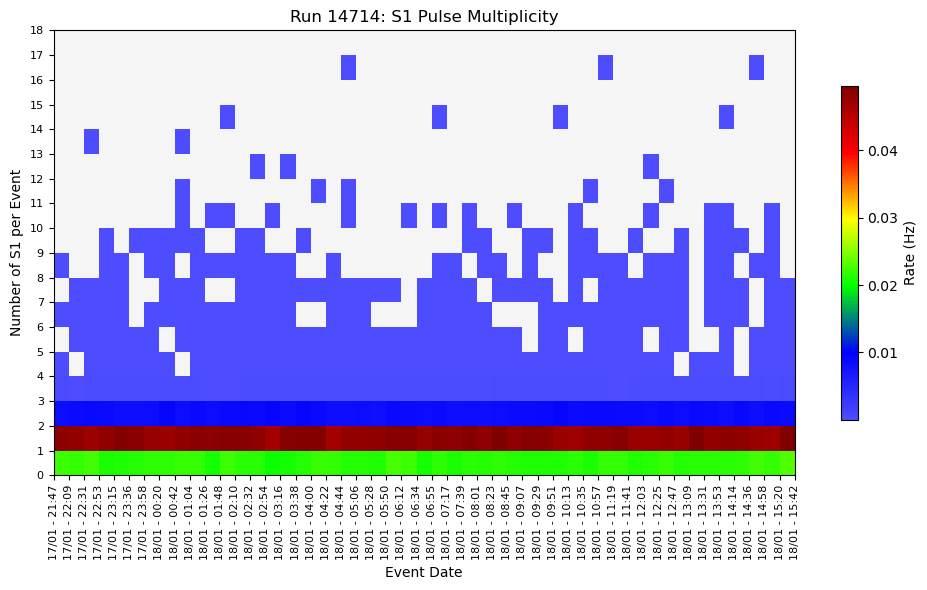

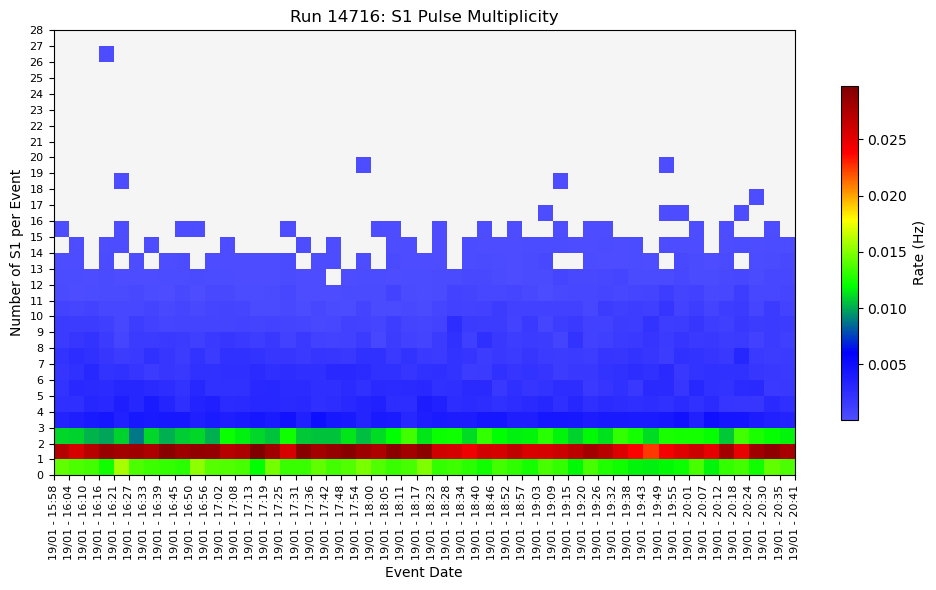

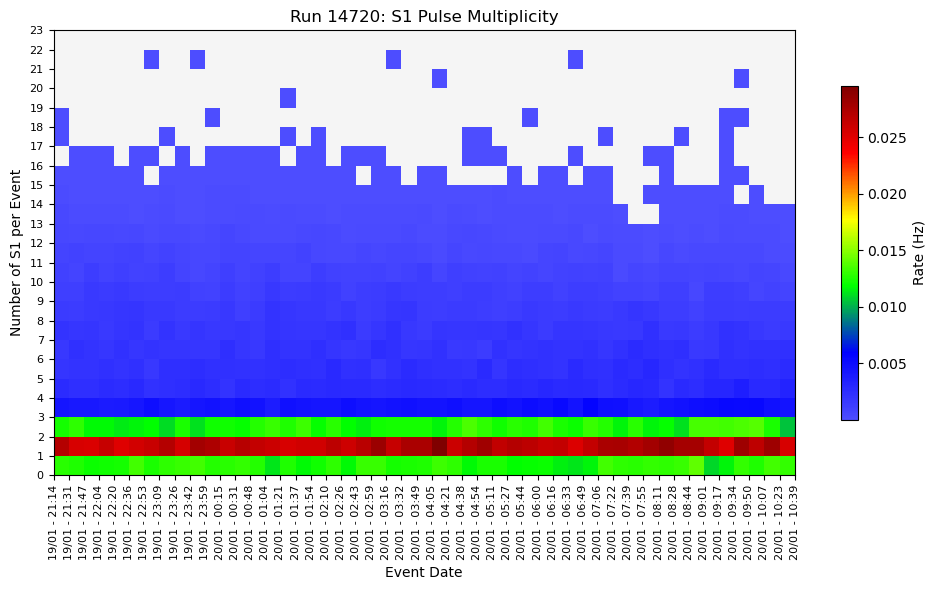

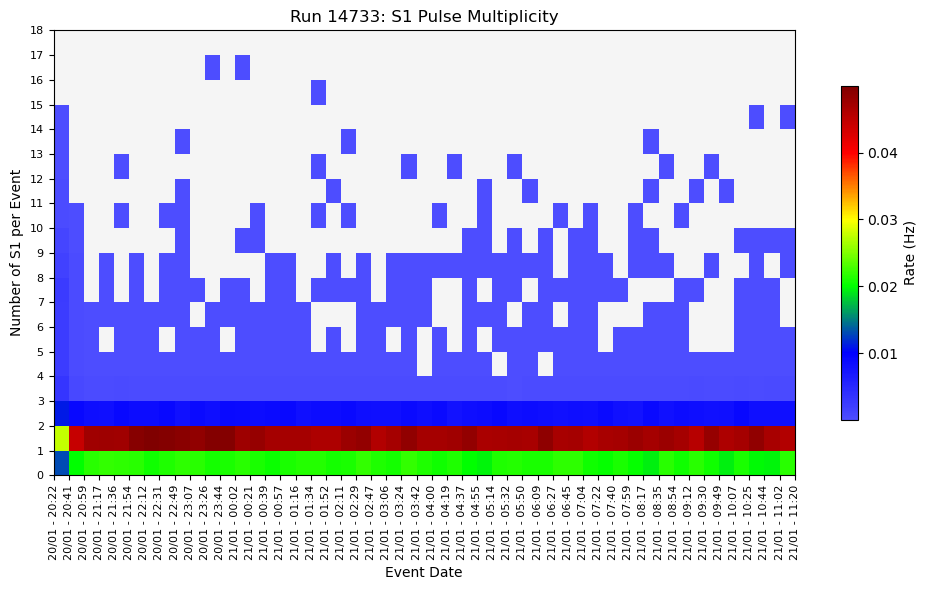

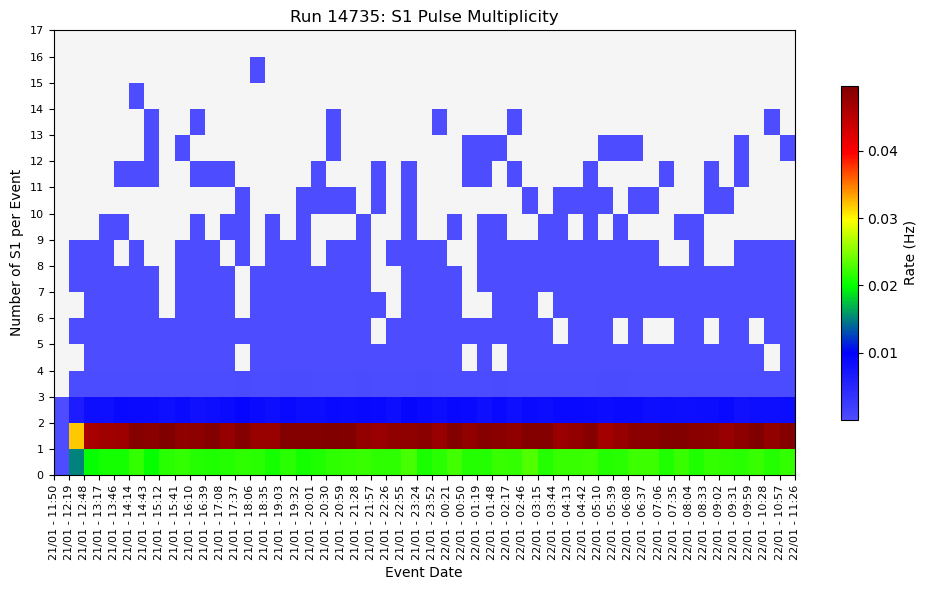

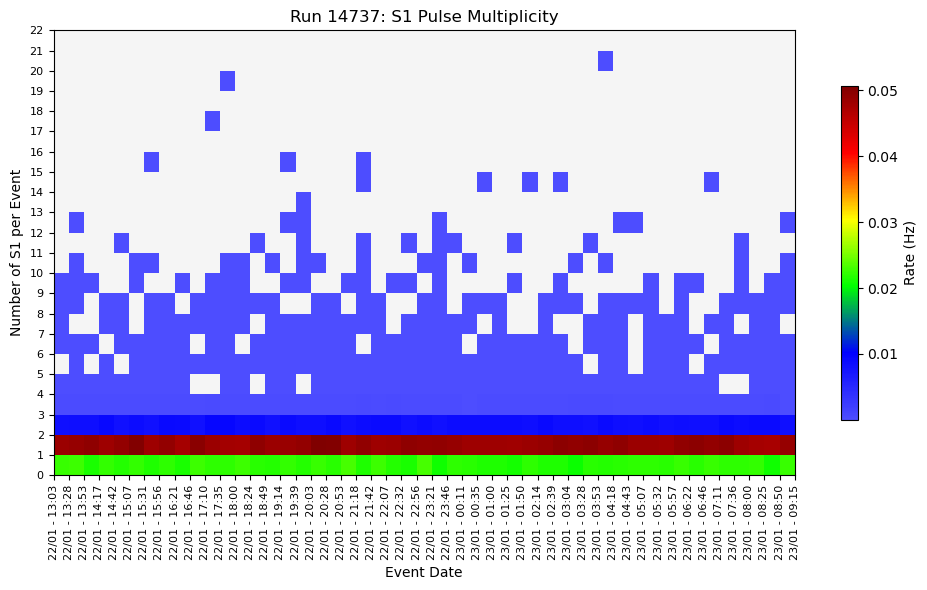

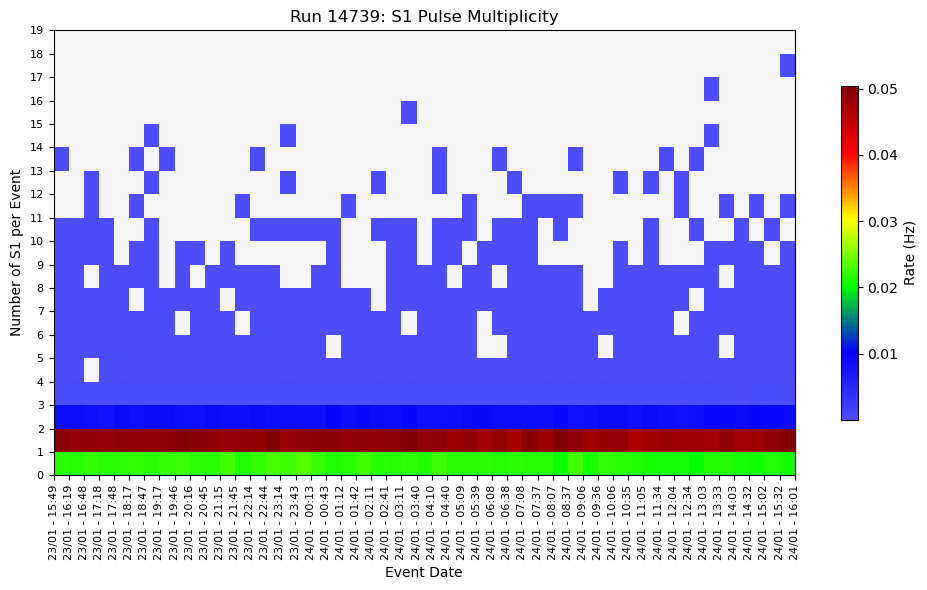

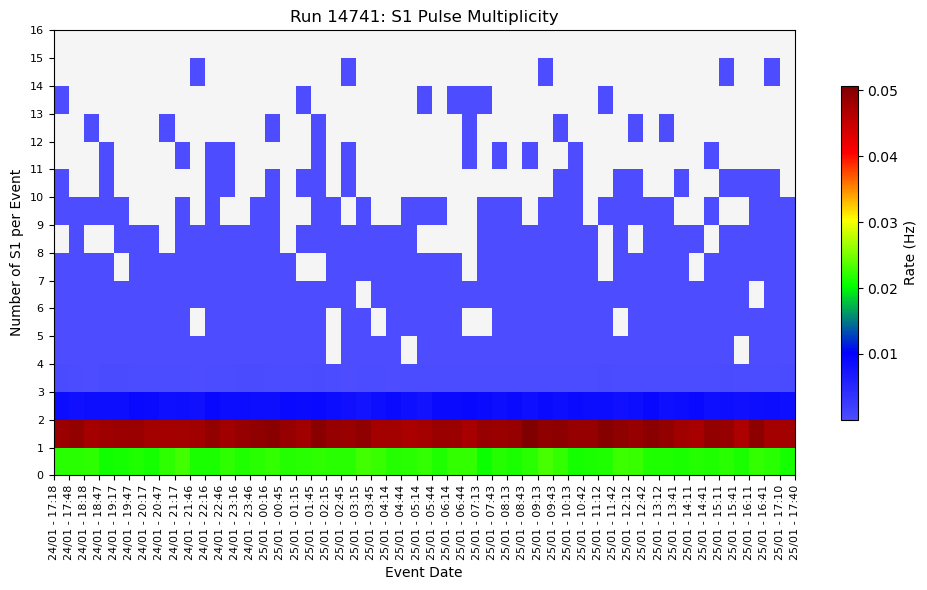

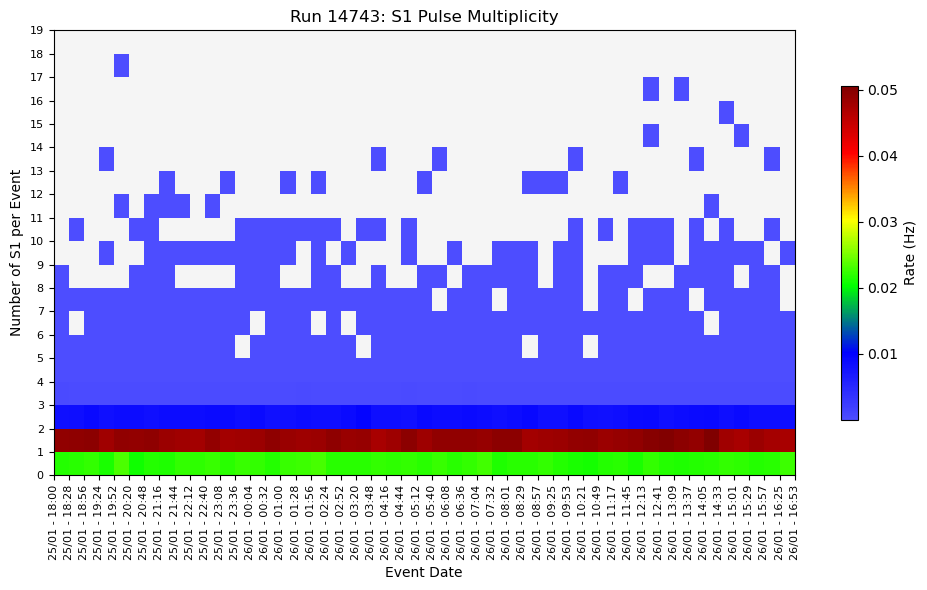

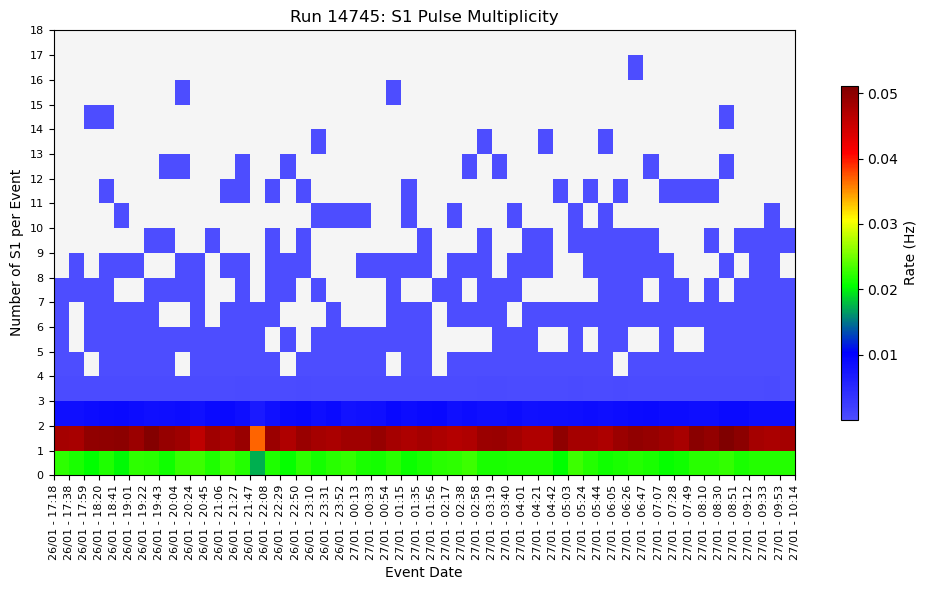

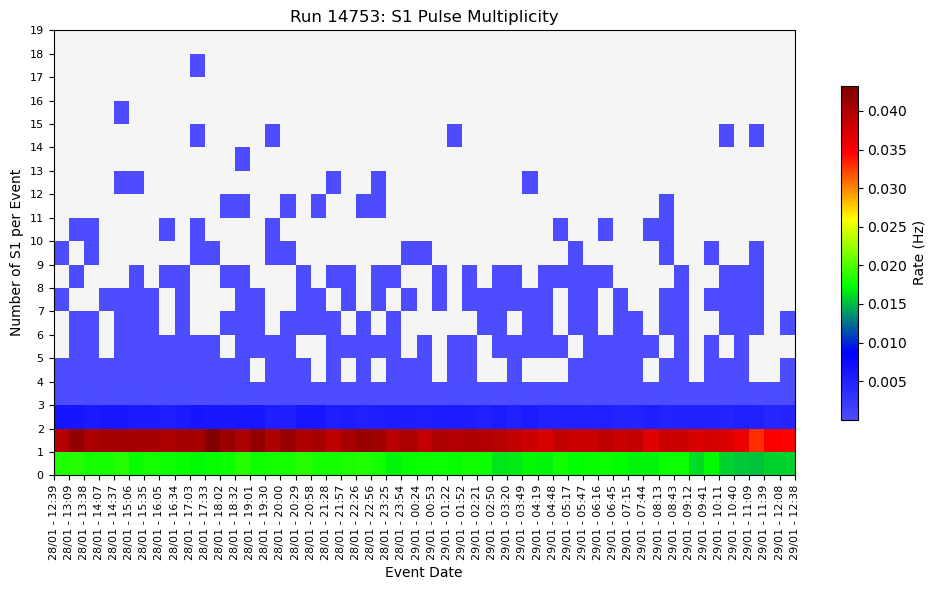

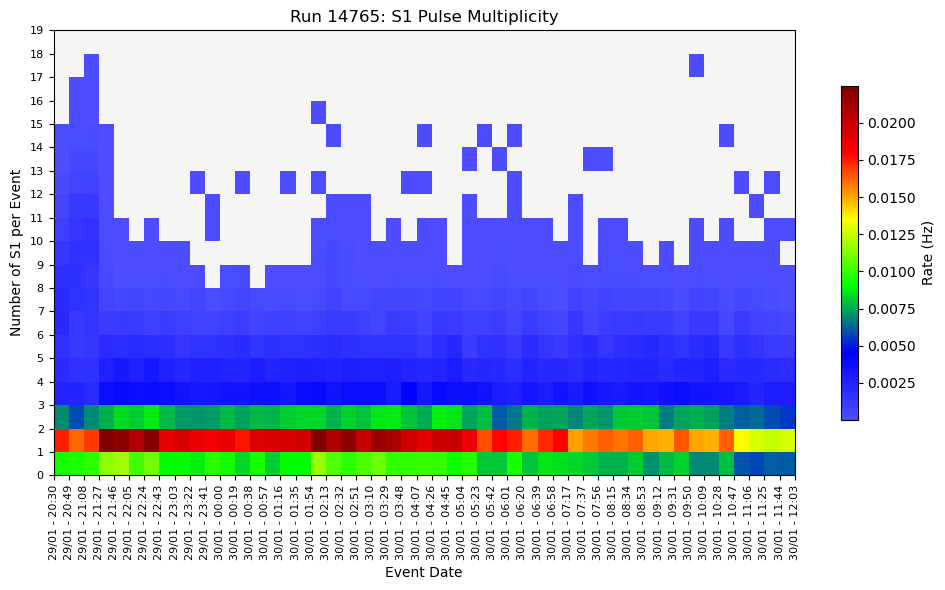

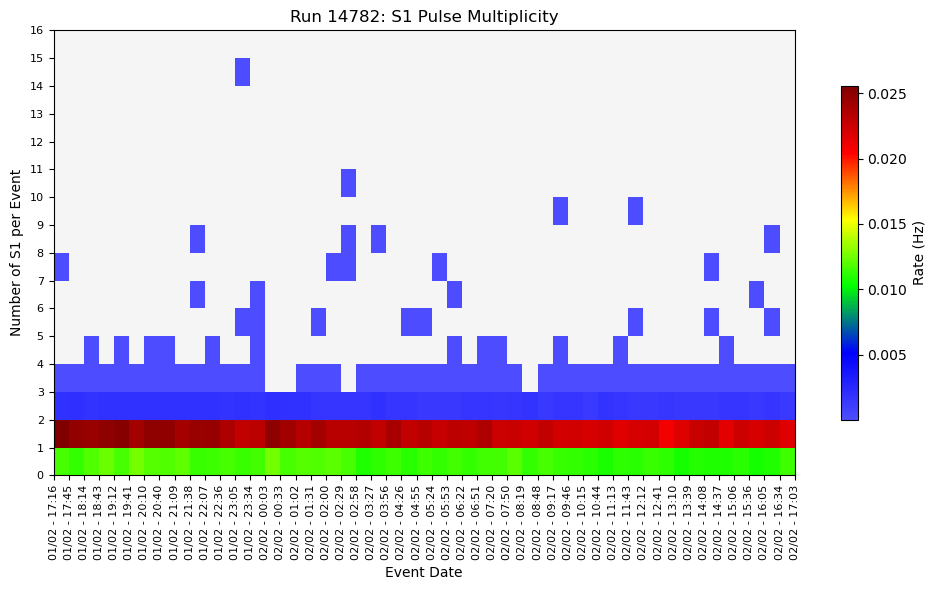

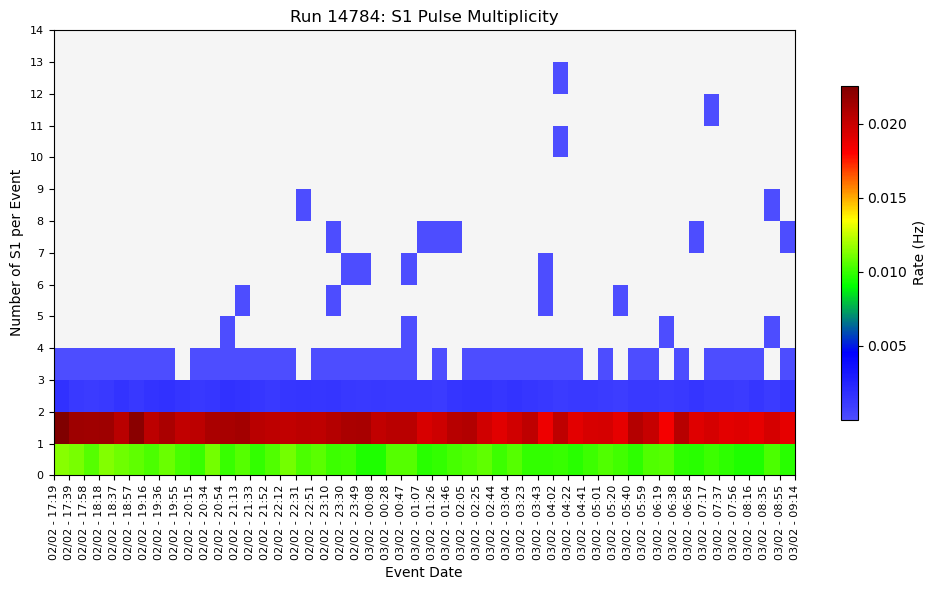

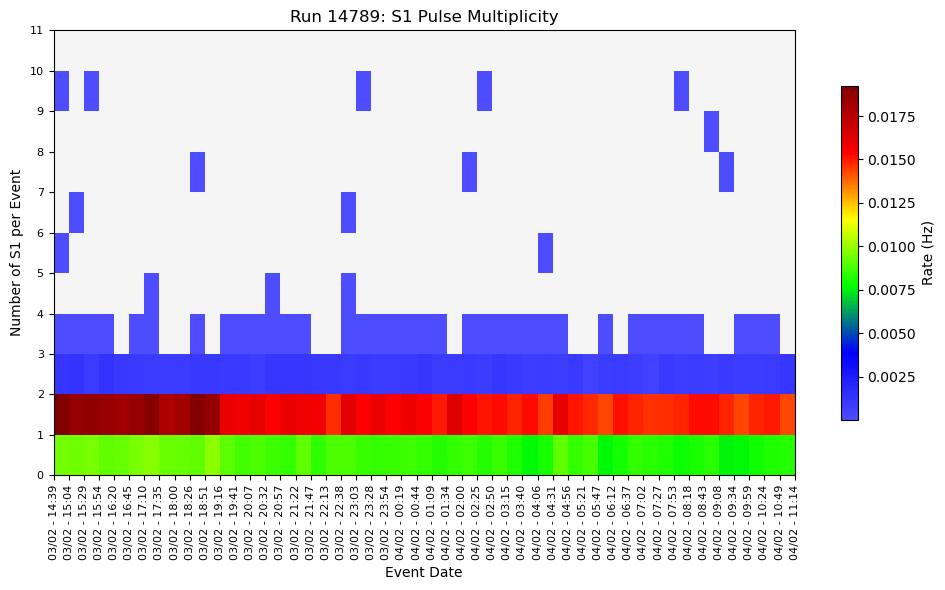

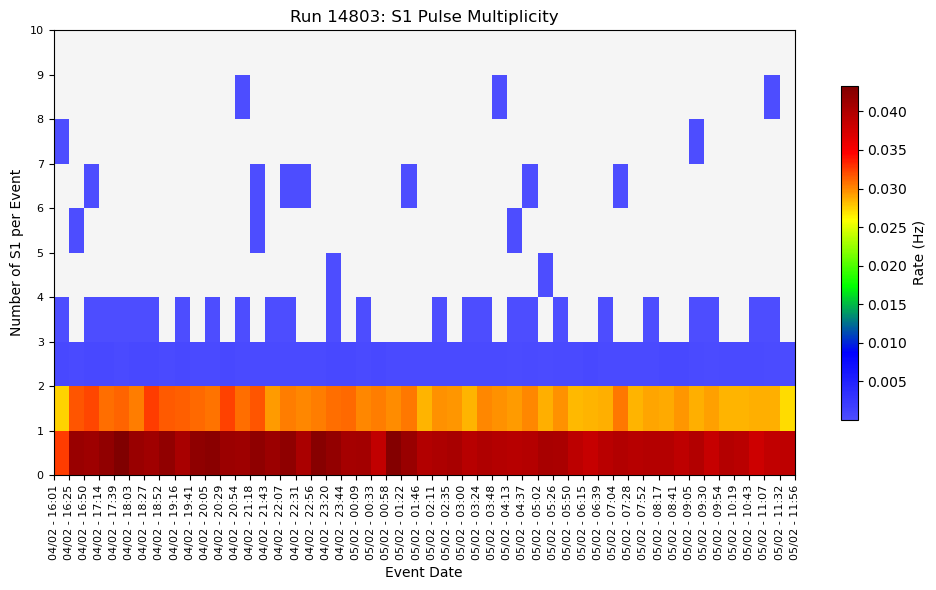

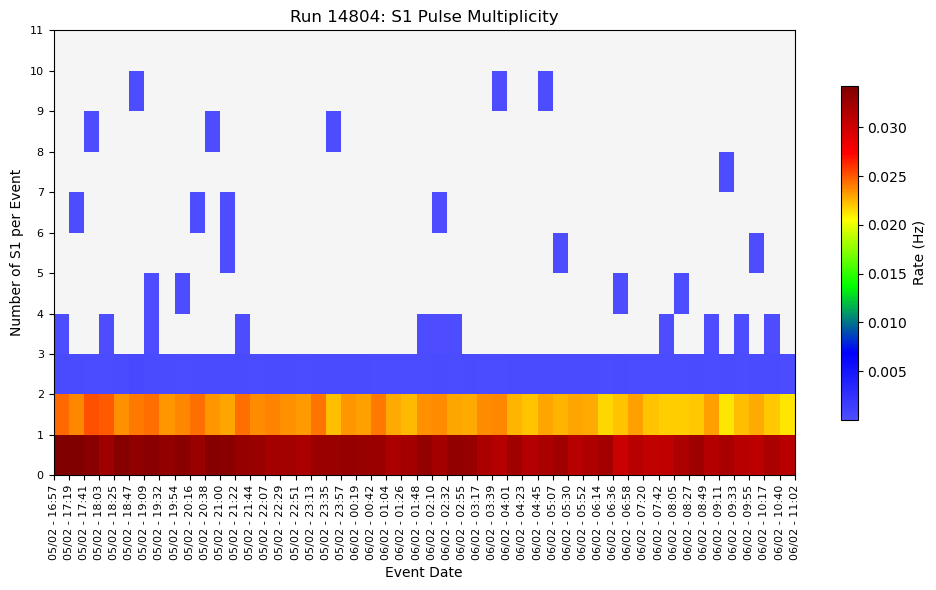

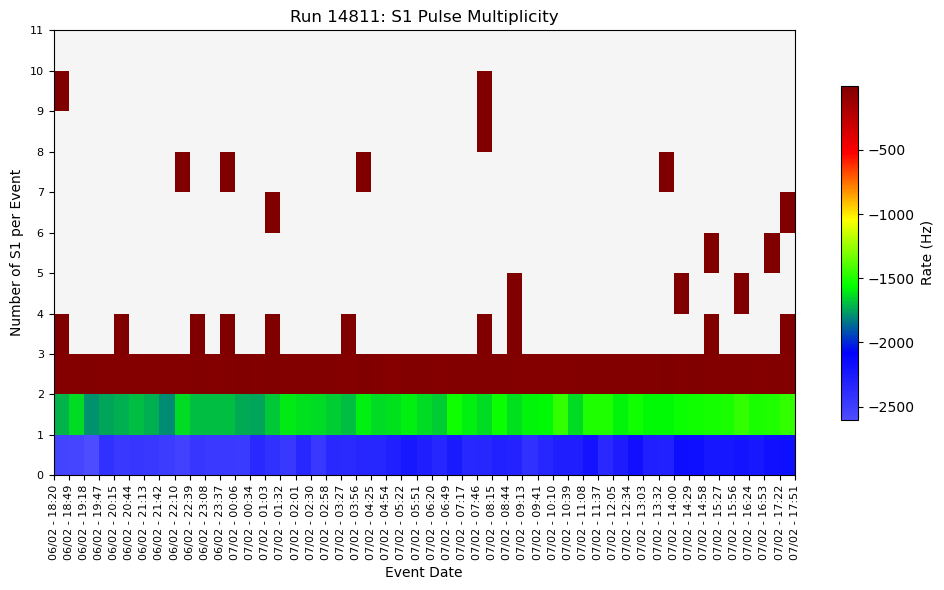

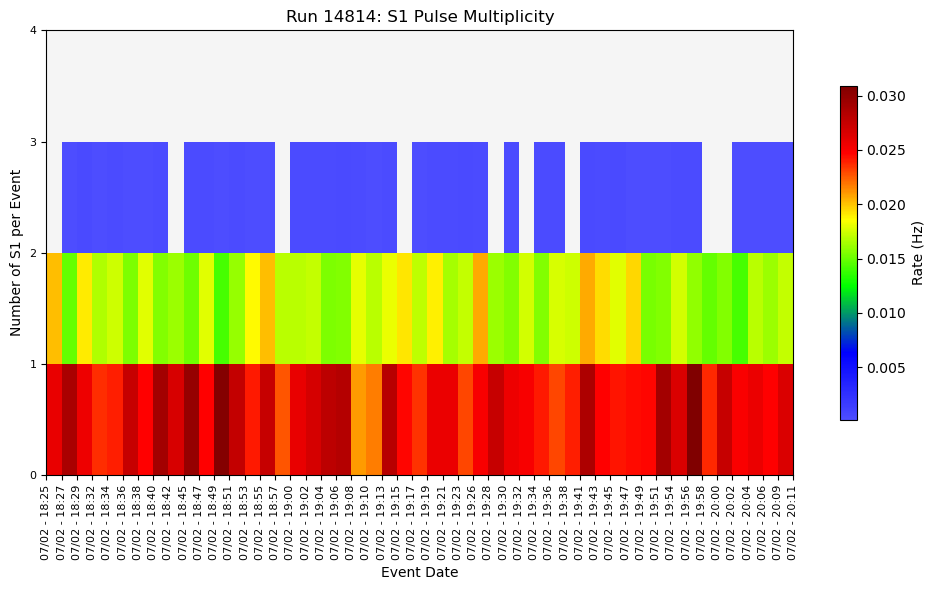

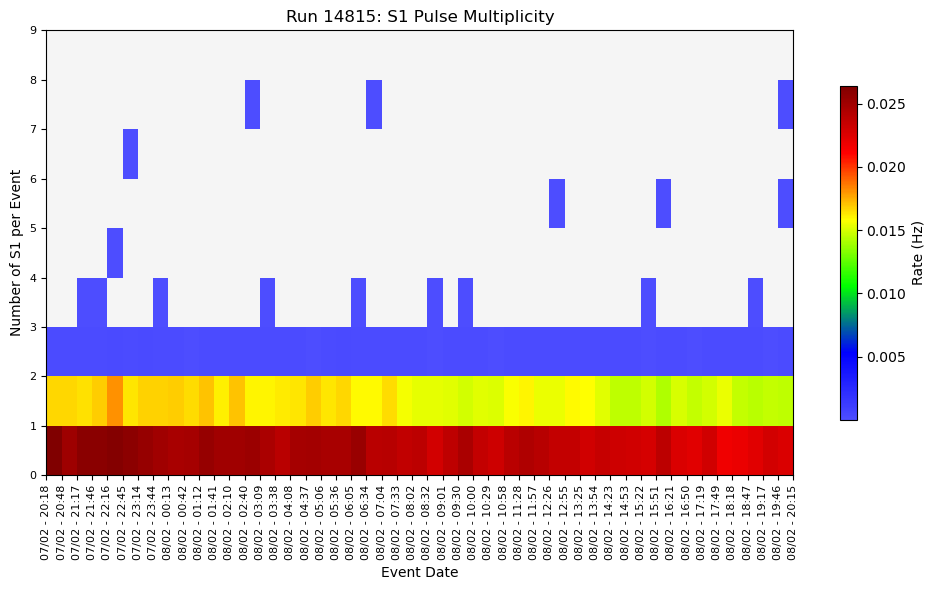

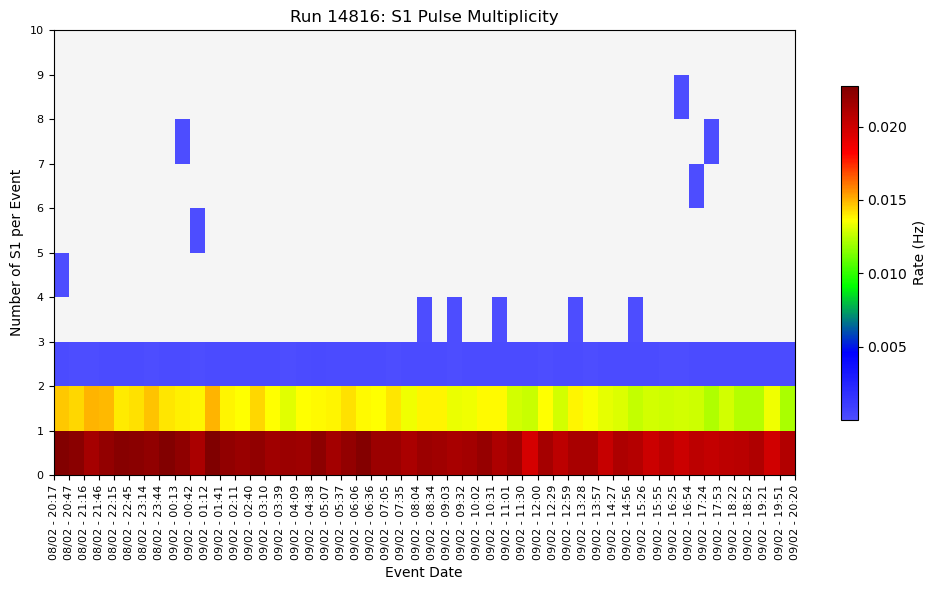

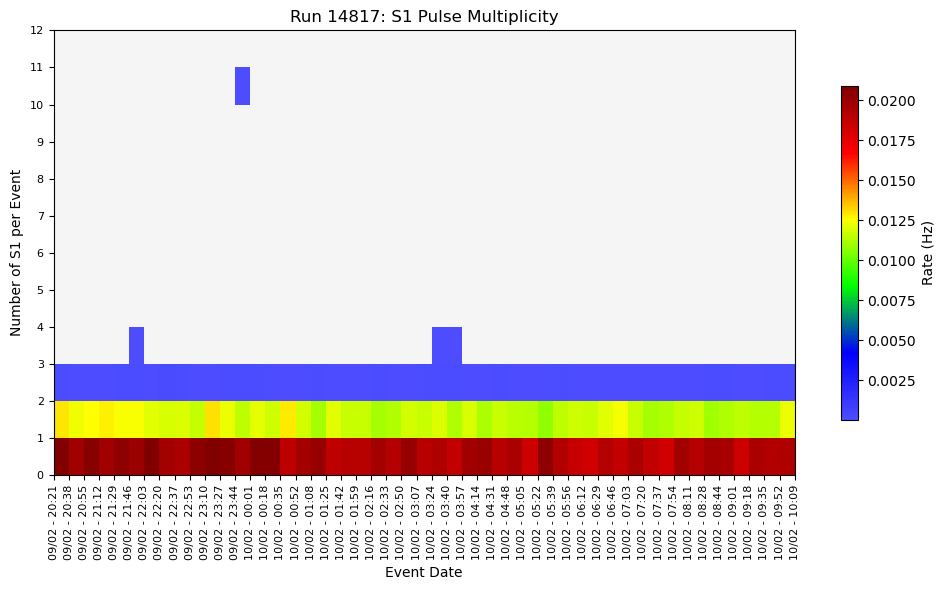

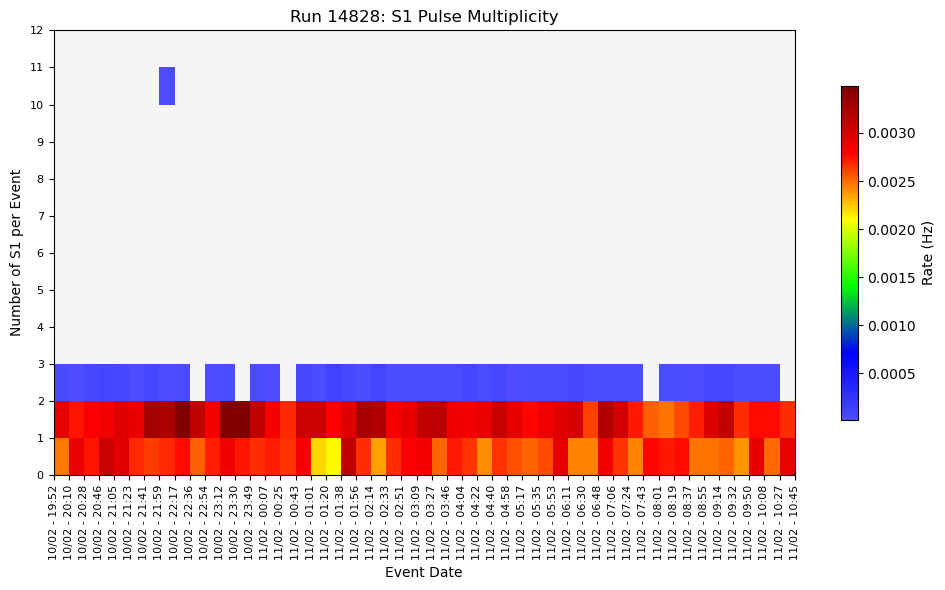

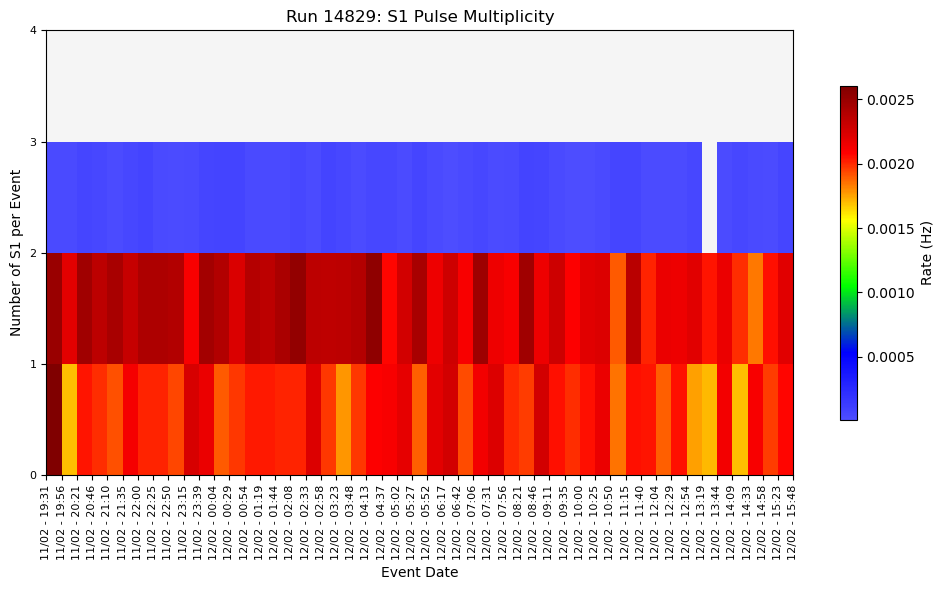

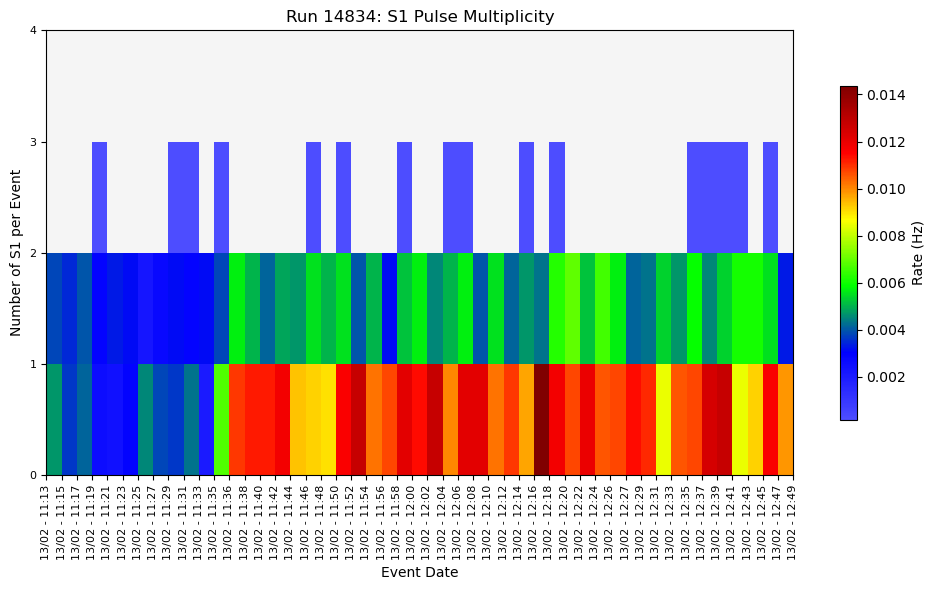

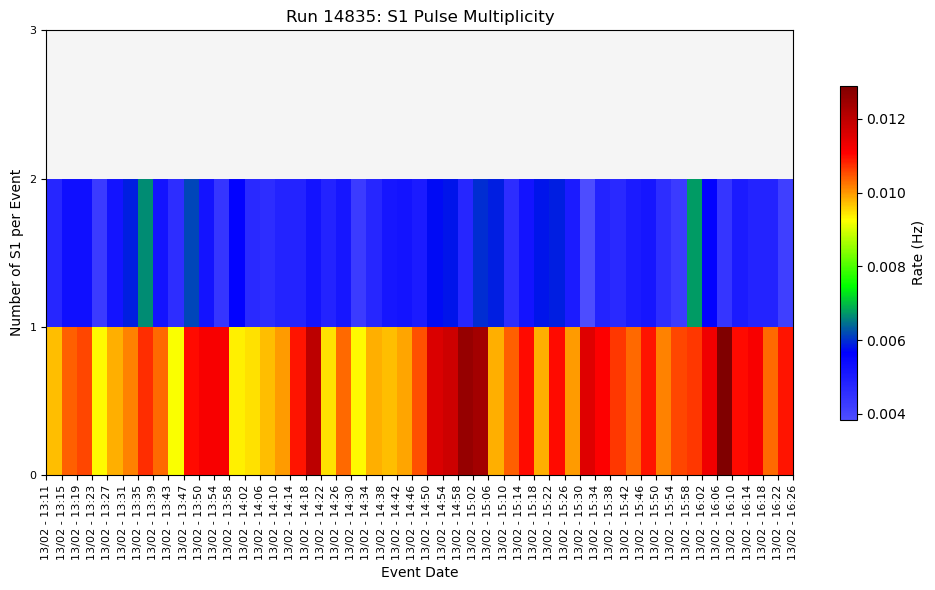

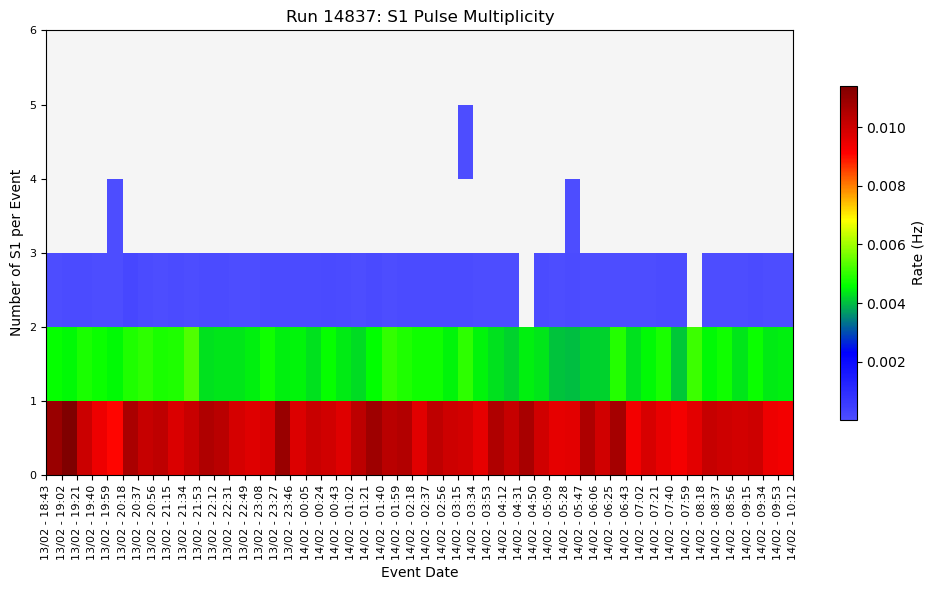

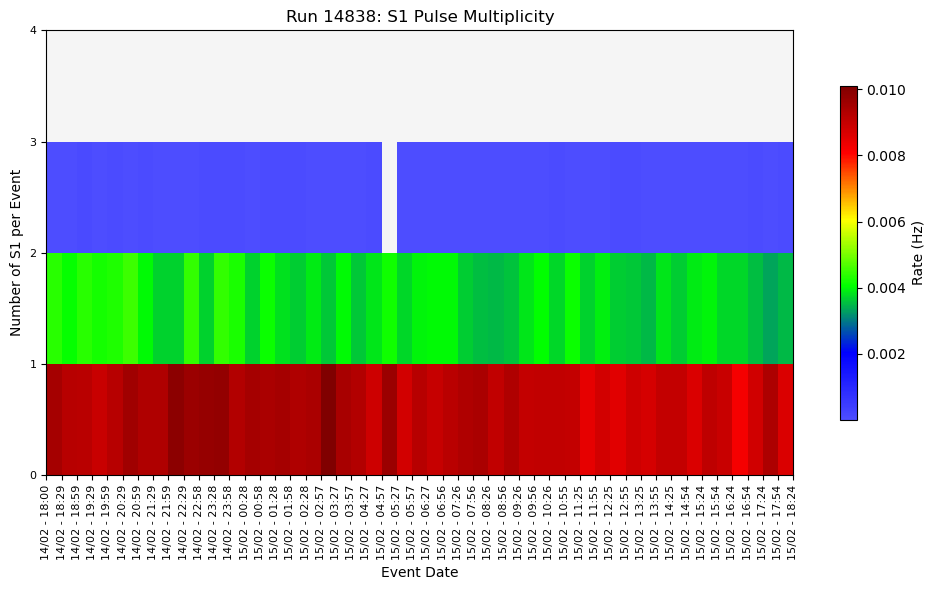

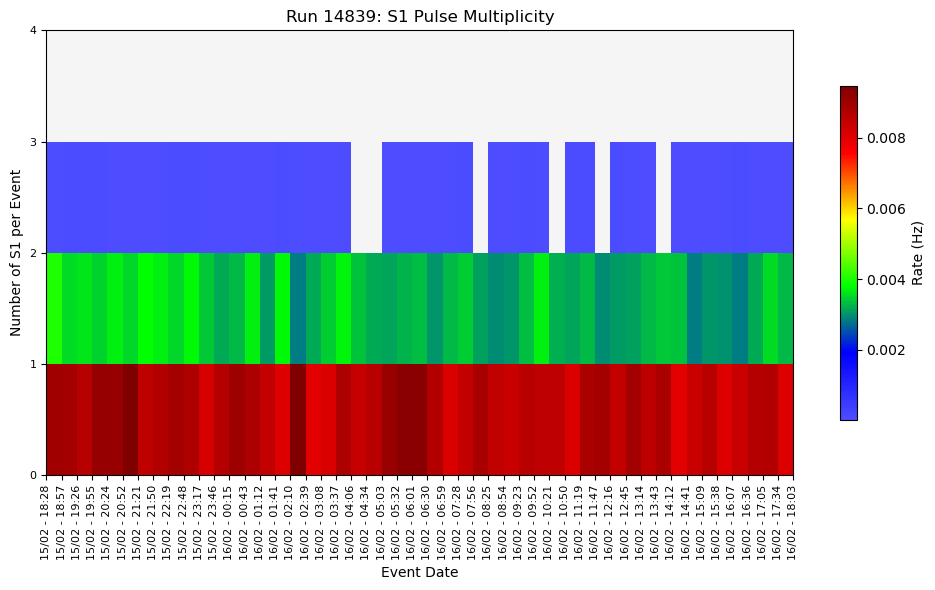

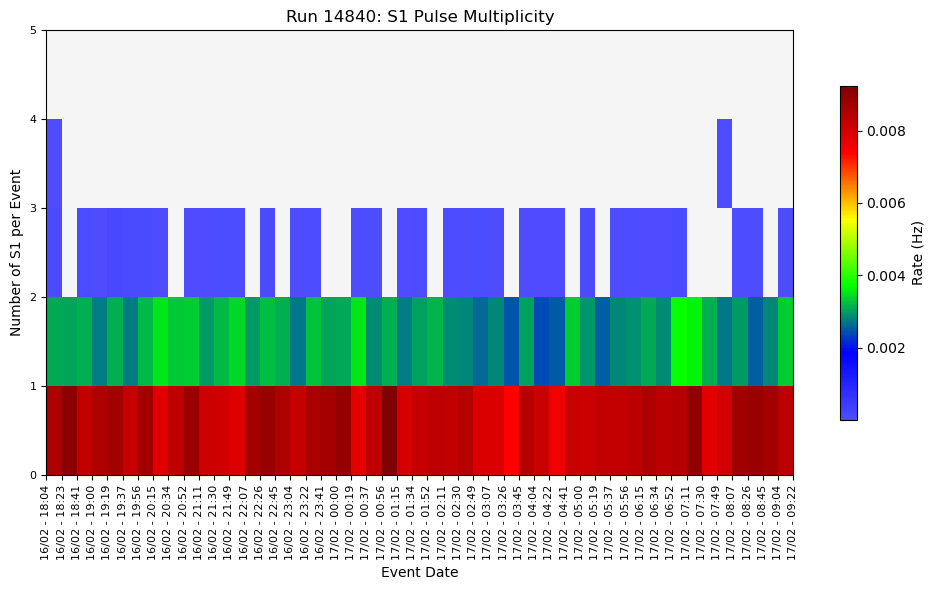

In [ ]:
# Global
nx_bins = 50
ny_bins = 10

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Store averages and errors per run: interest just in nS1 and time!
    interest_data = raw_data[run_id][['event', 'nS1', 'time']]
    mean_run[run_id]['nS1_average']  = interest_data['nS1'].mean()
    mean_run[run_id]['nS1_error']    = interest_data['nS1'].std() / np.sqrt(len(interest_data['nS1']))      # Standard error of the mean     
    mean_run[run_id]['time_average'] = interest_data['time'].mean() 
    mean_run[run_id]['time_error']   = interest_data['time'].std() / np.sqrt(len(interest_data['time']))
    
    # Within the run...
    event = raw_data[run_id].groupby('event')[['nS1', 'time']].mean()
    
    # Variable y-binning
    ny_bins = int(event['nS1'].max()) + 1
    
    # 2D histogram
    nS1_Date_map, ex, ey = pt.hist_2D(event['time'], event['nS1'], x_bins=nx_bins, y_bins=ny_bins)
    nS1_Date_map         = nS1_Date_map / run_long
    nS1_Date_map         = np.ma.masked_where(nS1_Date_map==0, nS1_Date_map)                                # Zero values masked
    
    # Convert x-axis bin edges to readable time format
    converted_ex = [crudo.epoch_converter(t, h=True) for t in ex]
    
    # In case you are not in an EL scan! HAY QUE ORGANIZAR Y COMENTAR MEJOR
    nS1_min = 0;  nS1_max = ny_bins
    
    # It's similiar as pt.prefit_2D function but with need modifications to include errors
    Date_centers = [];  Date_errors  = []
    nS1_means  = [];  nS1_errors = []
    
    # Loop over Date bins
    for i in range(len(ex) - 1):
        
        # Compute x-axis bin center and error
        x_center = 0.5 * (ex[i] + ex[i + 1])
        x_error  = 0.5 * (ex[i + 1] - ex[i])
        
        Date_centers.append(x_center);  Date_errors.append(x_error)

        # Select data in the current bin
        in_bin = (event['time'] >= ex[i]) & (event['time'] < ex[i + 1])

        # Compute the mean if there is data in the bin
        if np.sum(in_bin) > 0:
            y_mean = np.mean(event['nS1'][in_bin])
            y_error = np.std(event['nS1'][in_bin]) / np.sqrt(len(event['nS1'][in_bin]))  # Standard error of mean (large, gaussian samples)
            # Apply optional filtering by y_min and y_max
            if (y_mean < nS1_min) or (y_mean > nS1_max):
                nS1_means.append(np.nan);    nS1_errors.append(np.nan)
            else:
                nS1_means.append(y_mean);  nS1_errors.append(y_error)                                                
        else:
            nS1_means.append(np.nan);  nS1_errors.append(np.nan)                       # No data in this bin

    # Remove NaN values
    valid_mask = ~np.isnan(nS1_means)
    Date_centers = np.array(Date_centers)[valid_mask];    Date_errors  = np.array(Date_errors)[valid_mask]
    nS1_means  = np.array(nS1_means)[valid_mask];     nS1_errors   = np.array(nS1_errors)[valid_mask]
    # Results                                                       
    mean_short_parameters[run_id] = {"CV_Date": Date_centers, "Error_Date": Date_errors, "CV_nS1": nS1_means, "Error_nS1": nS1_errors} 
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(ex, ey, nS1_Date_map.T, cmap=pt.custom_hsv, shading='auto')
    cbar = plt.colorbar(label='Rate (Hz)', shrink=0.75)
    # cbar.formatter.set_powerlimits((0, 0))
    plt.xlabel('Event Date')
    plt.xticks(ex[::len(ex)//nx_bins], converted_ex[::len(ex)//nx_bins], rotation=90, ha='center', fontsize=8)   # Set custom tick positions and labels
    plt.ylabel('Number of S1 per Event')
    y_ticks = np.arange(0, ny_bins + 1, 1)
    plt.yticks(y_ticks, fontsize=8) 
    # plt.ylim(0, 10)
    plt.title(f'Run {run_id}: S1 Pulse Multiplicity')
    
    plt.gca().set_facecolor("whitesmoke")
    # plt.savefig(f'images/selecting_criteria/nS1_Date_run{run_id}.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

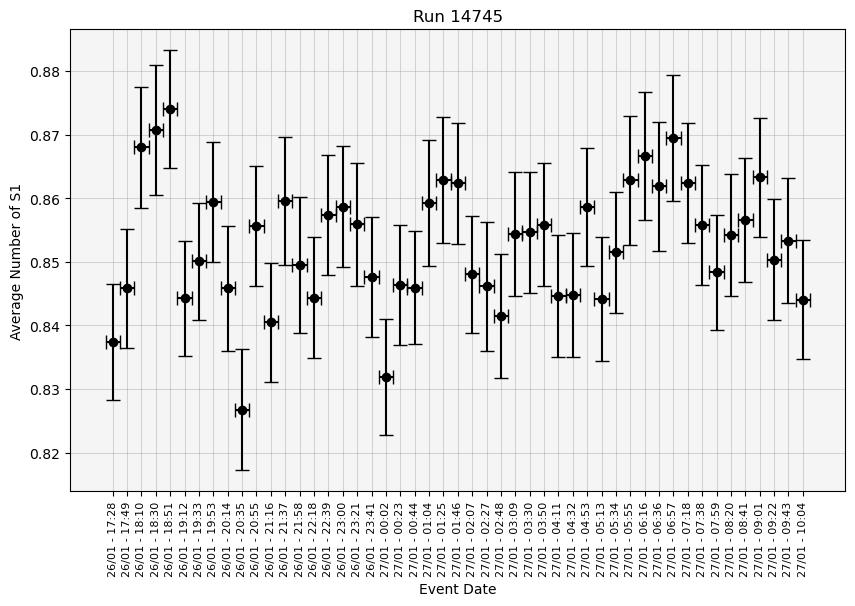

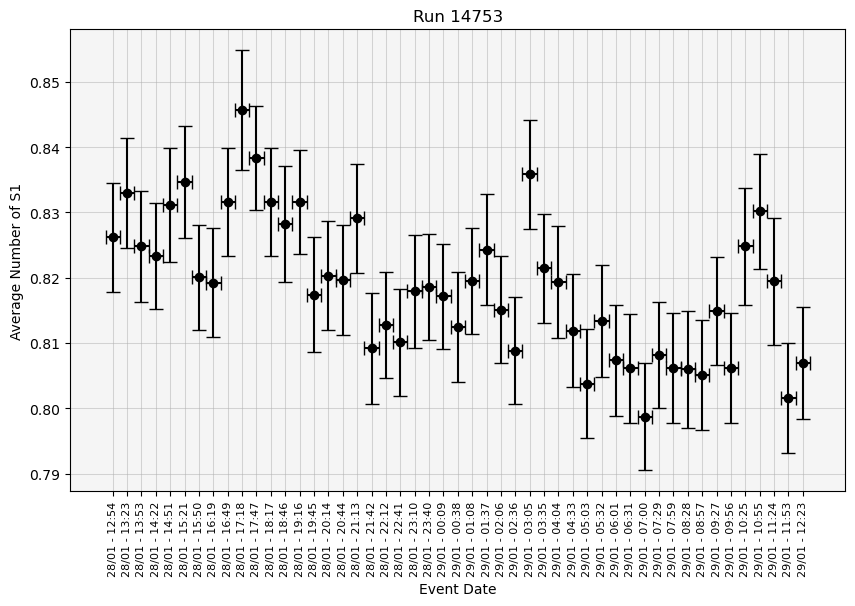

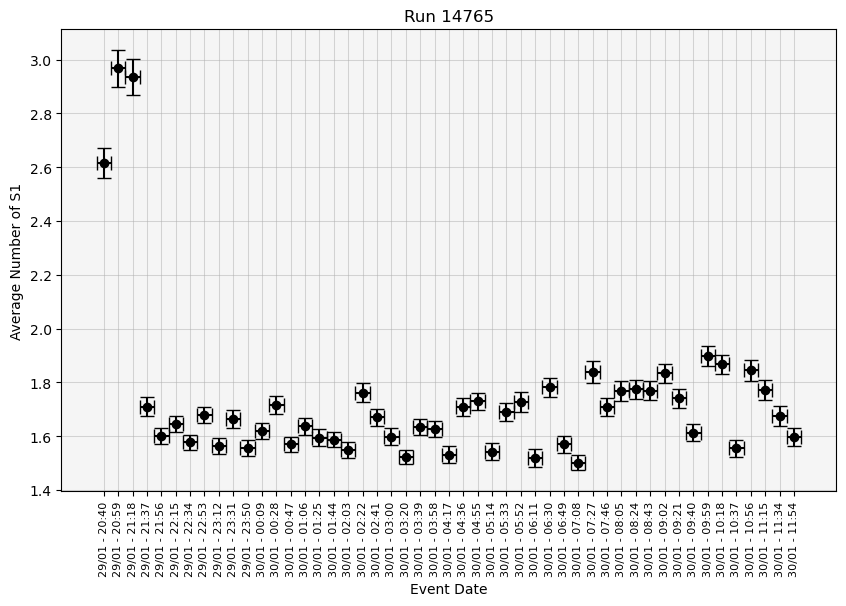

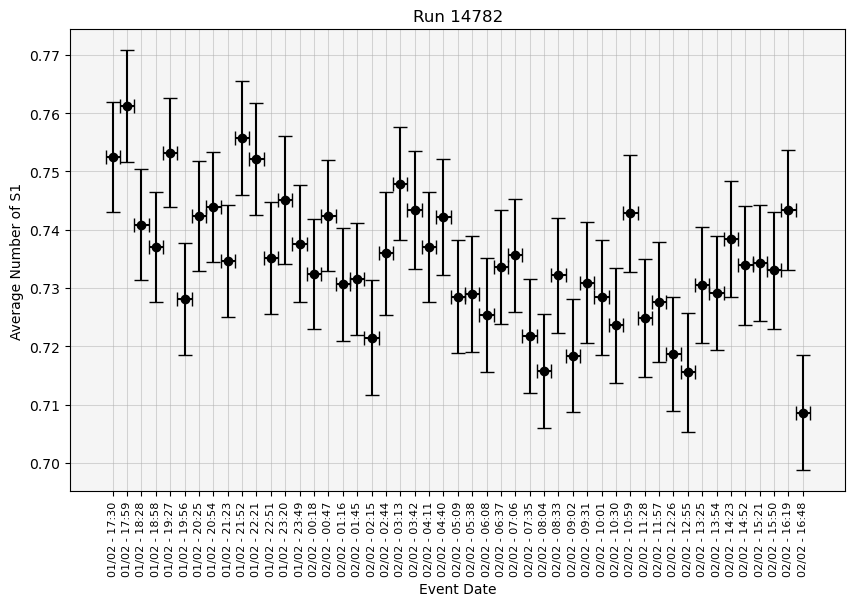

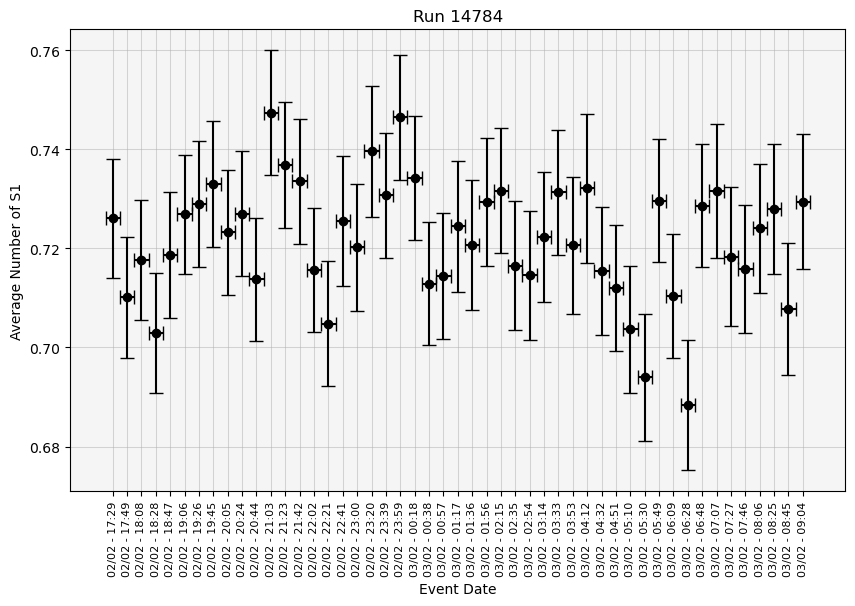

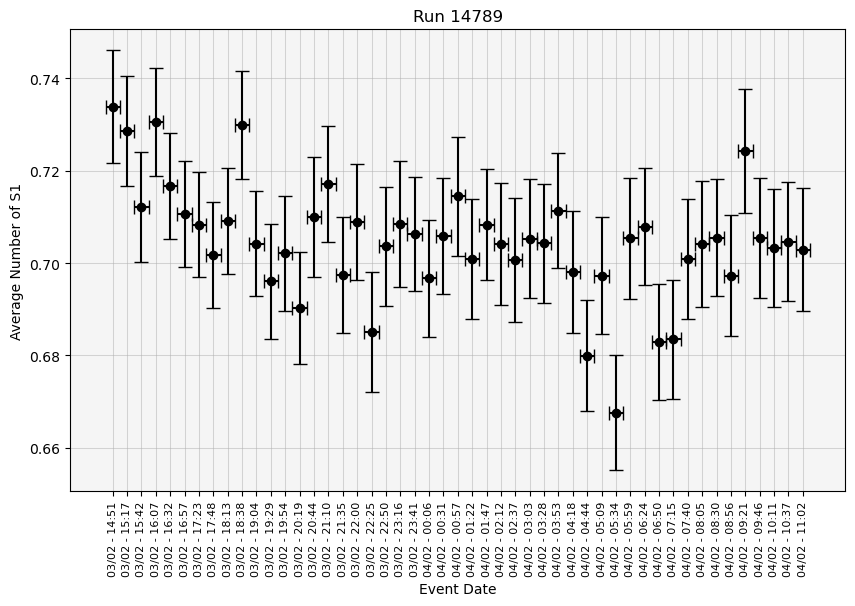

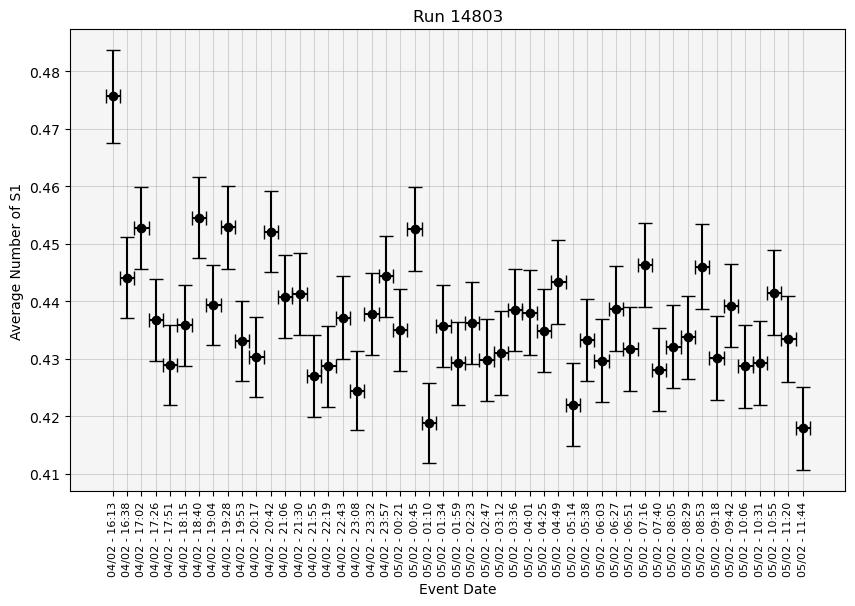

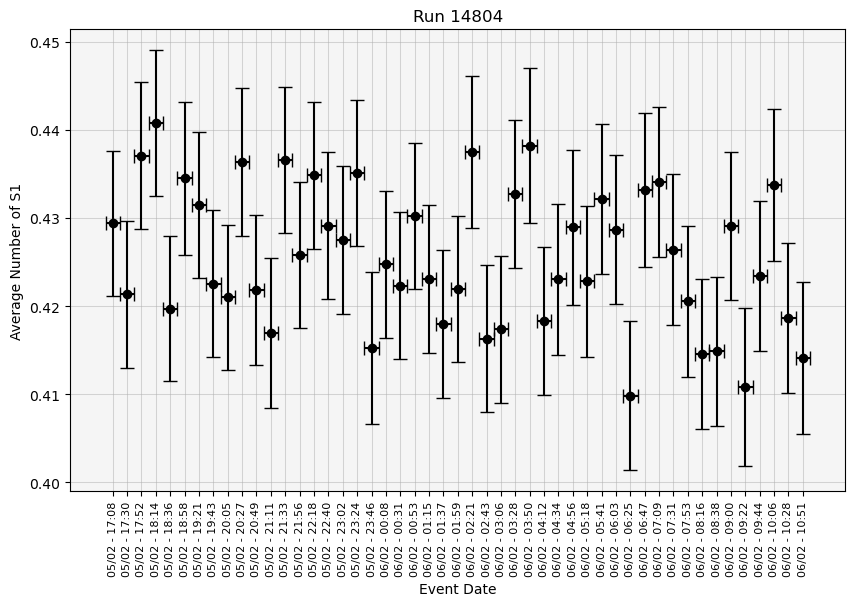

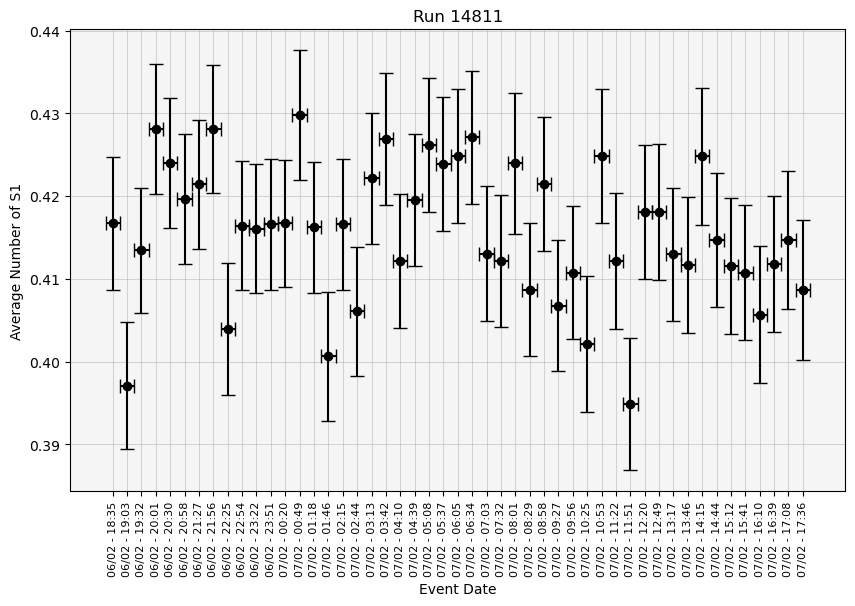

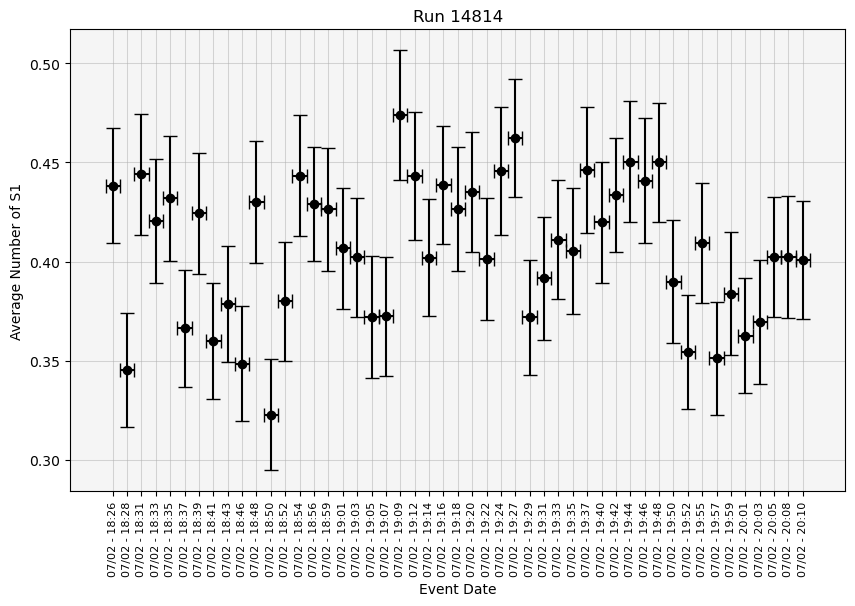

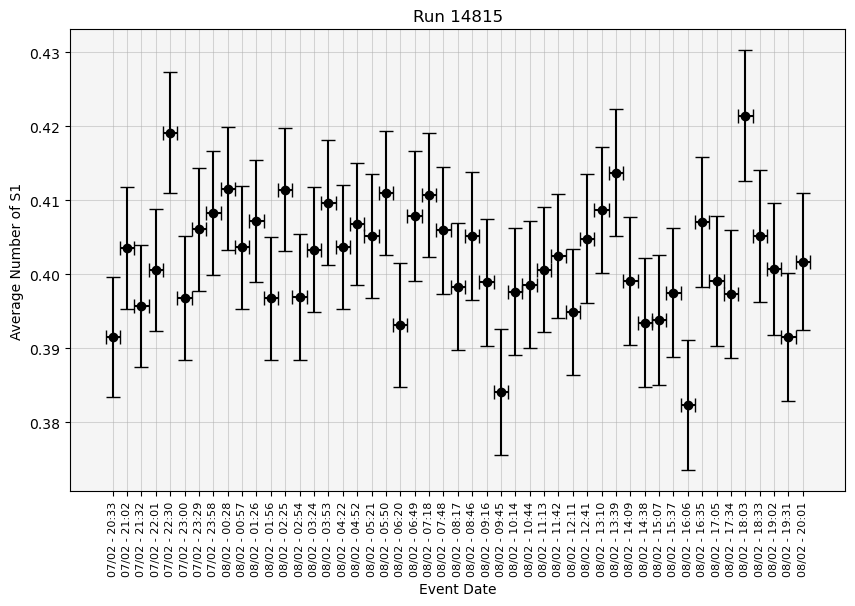

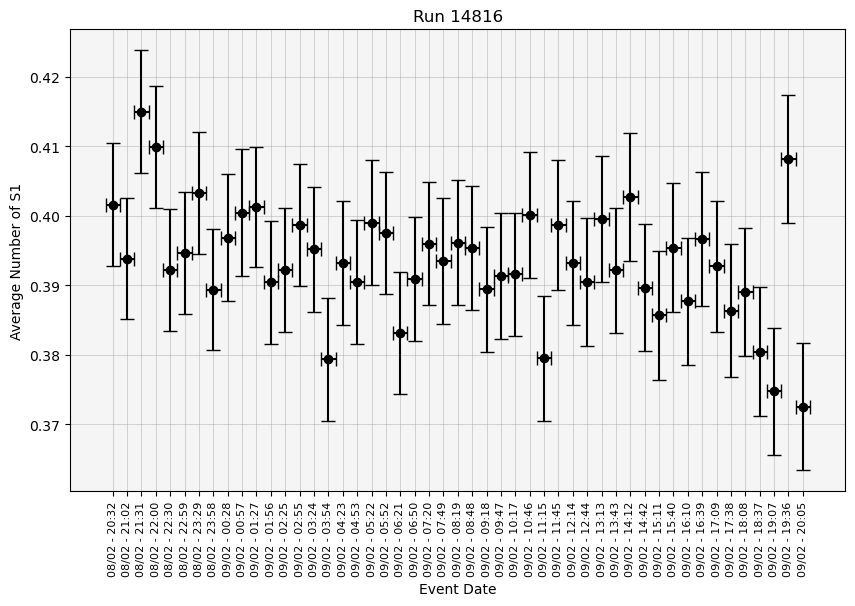

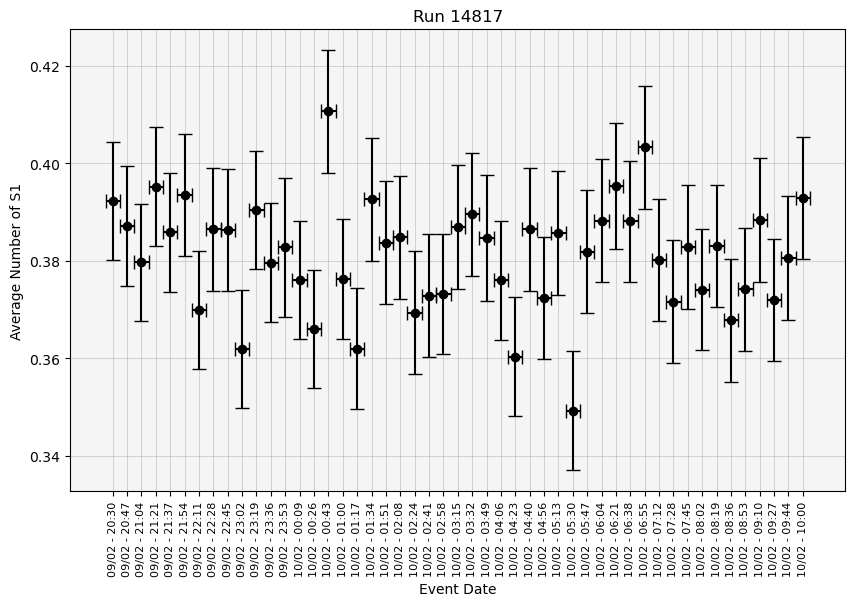

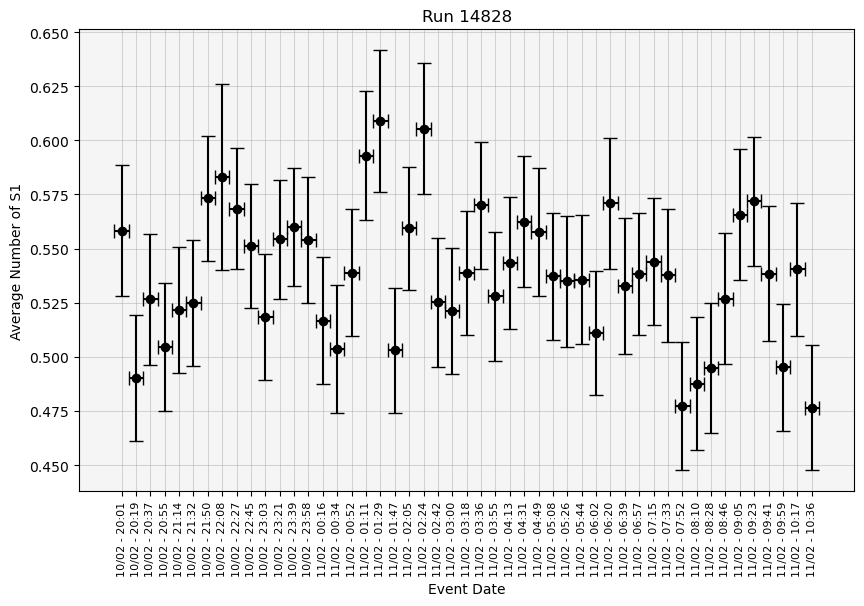

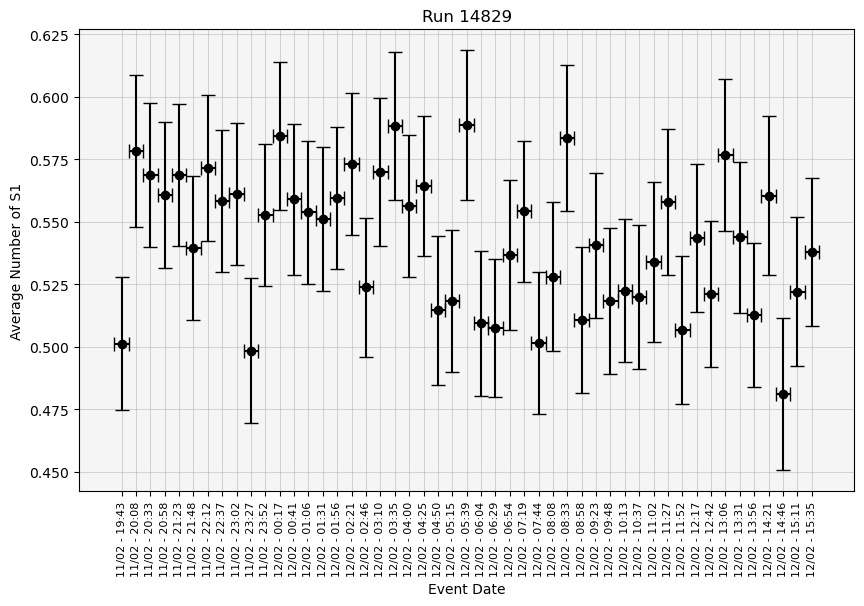

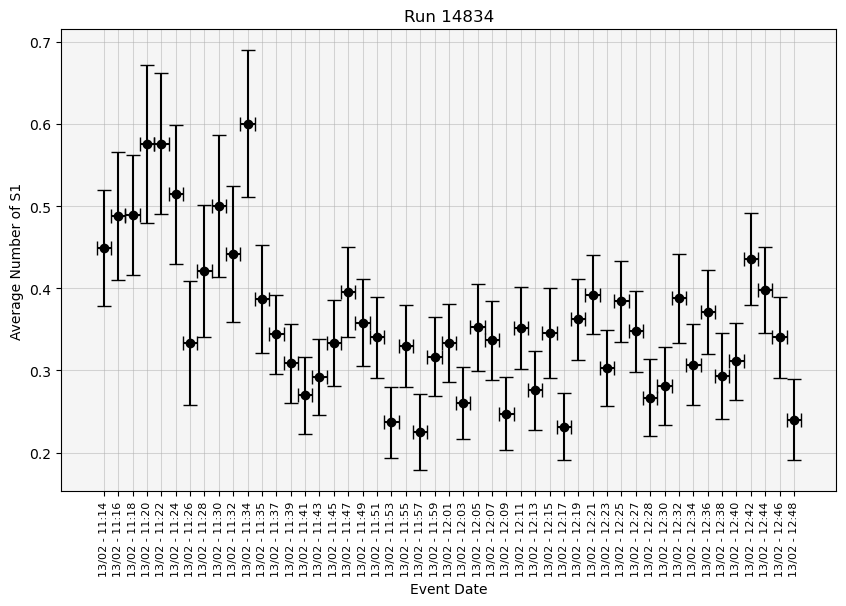

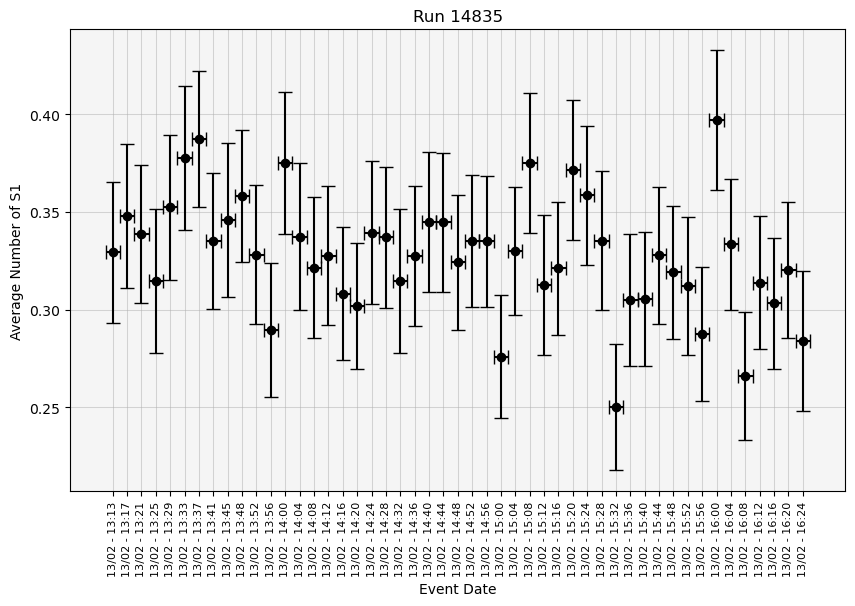

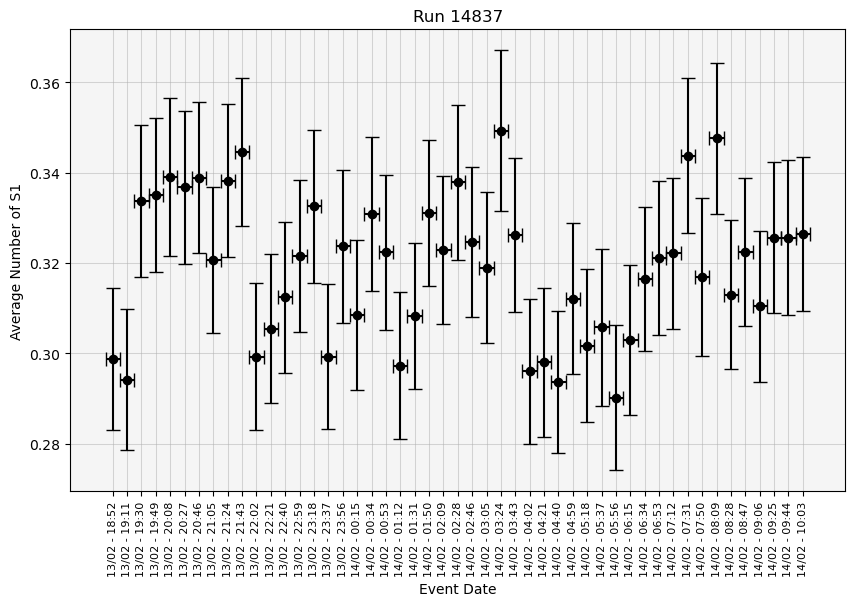

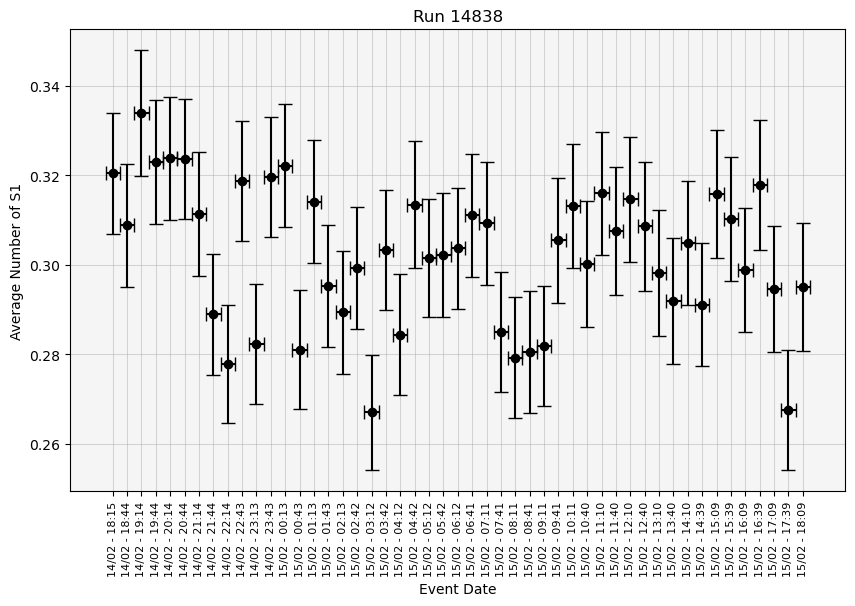

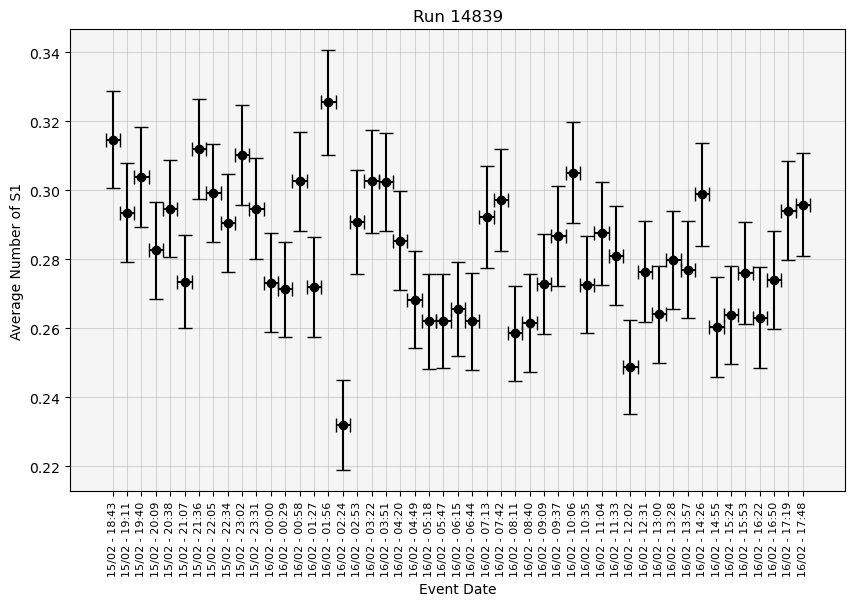

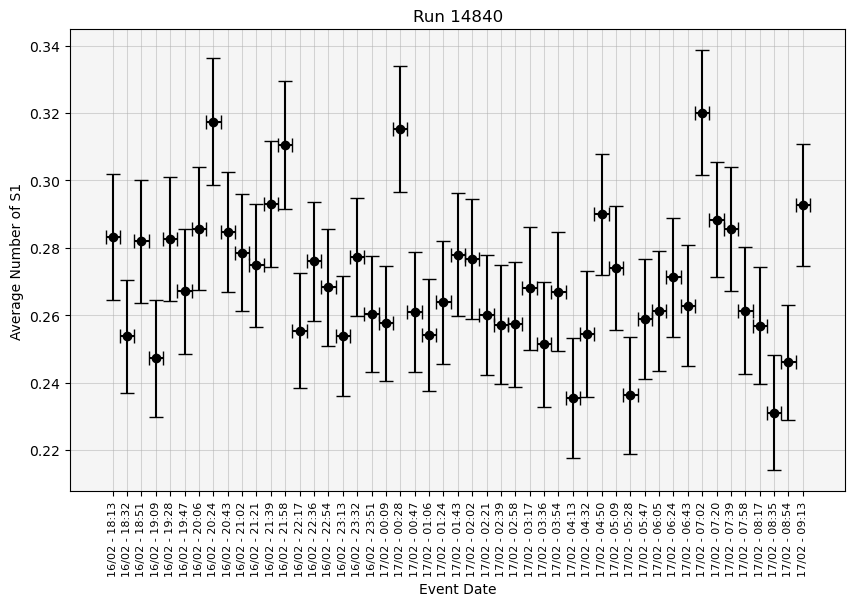

In [6]:
# Global

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Retrieve light yield (short-term) info  
    CV_Date  = mean_short_parameters[run_id]['CV_Date']
    Err_Date = mean_short_parameters[run_id]['Error_Date']
    CV_nS1   = mean_short_parameters[run_id]['CV_nS1']
    Err_nS1  = mean_short_parameters[run_id]['Error_nS1']
    
    # Convert x-axis bin edges to readable time format.
    x_labels = [crudo.epoch_converter(t, h=True) for t in CV_Date]
       
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(CV_Date, CV_nS1, xerr=Err_Date, yerr=Err_nS1,
                 fmt='o', c='black', ecolor='black', capsize=5)
    
    # Styling
    plt.xlabel('Event Date')
    plt.xticks(CV_Date, x_labels, rotation=90, ha='center', fontsize=8)
    plt.ylabel('Average Number of S1')
    # plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    plt.title(f'Run {run_id}')
    
    plt.gca().set_facecolor("whitesmoke")
    plt.grid(True, linestyle='-', linewidth=0.75, alpha=0.5)
    plt.savefig(f'images/selecting_criteria/nS1_short_evolution_run{run_id}.png', bbox_inches='tight')
    plt.show()

Runs Date

[1737179119.4976182, 1737307402.136773, 1737341437.4878135, 1737427275.580069, 1737500332.7076411, 1737583709.2390716, 1737687225.9733078, 1737779396.521381, 1737865625.6862938, 1737938887.2630675, 1738106359.7590237, 1738204666.647905, 1738468352.8594596, 1738541249.3330574, 1738625530.0505548, 1738716634.9481688, 1738803045.6190317, 1738903693.7949574, 1738952294.8542185, 1738997895.6787453, 1739084695.6470551, 1739153389.8059216, 1739239910.7918682, 1739334544.0412745, 1739444844.9121568, 1739454577.9925718, 1739496184.7882426, 1739595527.4786978, 1739682330.8394353, 1739752825.9474149]


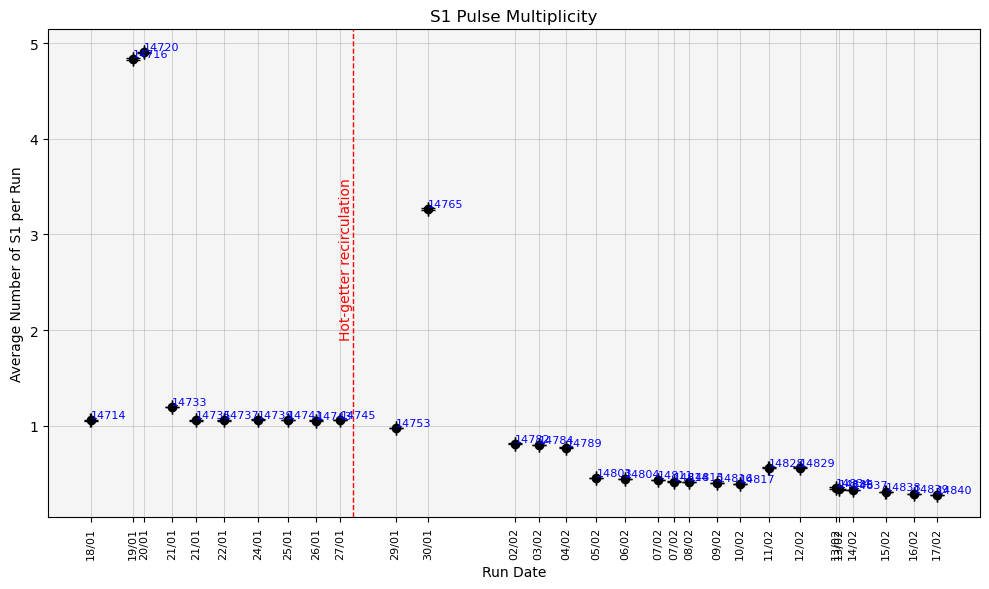

In [11]:
# Global
x_date = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    
    # Retrieve information
    nS1_CV     = mean_run[run_id]['nS1_average']
    nS1_error  = mean_run[run_id]['nS1_error']
    Date_CV    = mean_run[run_id]['time_average']
    Date_error = mean_run[run_id]['time_error']
    x_date.append(Date_CV)

    # Plot
    plt.errorbar(Date_CV, nS1_CV, xerr=Date_error, yerr=nS1_error, 
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, nS1_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Convert x-axis bin edges to readable time format. Flatten all_run_x for custom tick setting
x_labels = [crudo.epoch_converter(t, h=False) for t in x_date]
print('Runs Date\n')
print(x_date)

# Styling
plt.xlabel('Run Date')
plt.xticks(x_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('Average Number of S1 per Run')
# plt.ylim(0, 60) 
plt.title(f'S1 Pulse Multiplicity')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 2.75, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, ls='-', lw=0.75, alpha=0.5)
plt.savefig(f'images/selecting_criteria/nS1_Date_evolution.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

## A Single Run Analysis

Just choose one run of your interest to perform the analysis.

In [14]:
# Define the run to be selected
selected_runs = [14739]

## Base Distributions (NO cuts!)

### Radial distribution

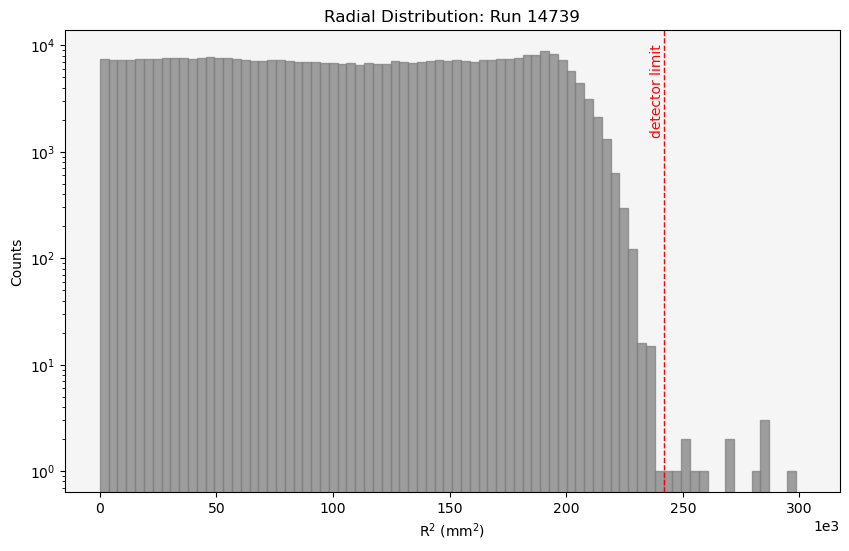

In [5]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        R2 = raw_data[run_id]['X']**2 + raw_data[run_id]['Y']**2
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(R2, bins=n_bins, range=(R2.min(), 1.25*pt.N100_rad**2),
                                   color=pt.hist_colors[i % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('R$^{2}$ (mm$^{2}$)')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.title(f'Radial Distribution: Run {run_id}')
        plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
        # Radial limit
        plt.axvline(x=pt.N100_rad**2, c='red', ls='--', lw=1)
        plt.text(pt.N100_rad**2, 0.5*counts[0], 'detector limit', c='red', va='center',  ha='right',  rotation=90)

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### DT distribution

Run 14739: There are 1 negative DT values.


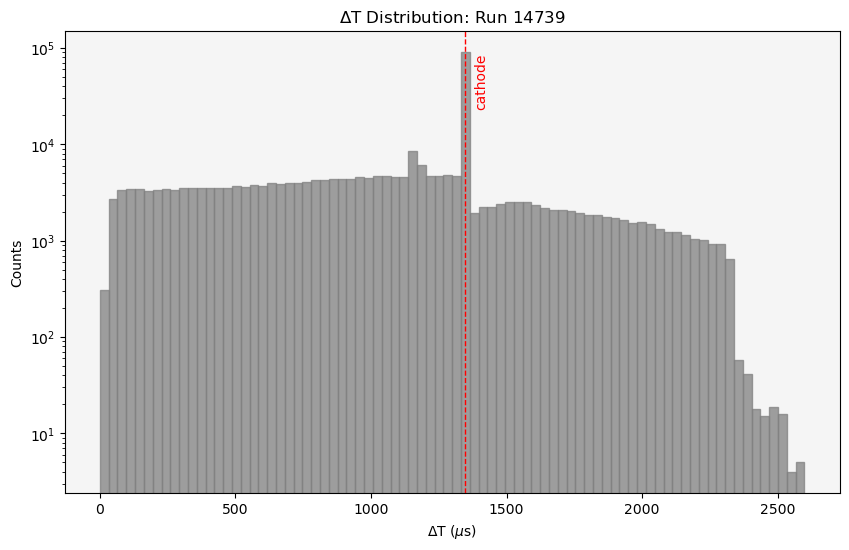

In [8]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        DT = raw_data[run_id]['DT']
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(DT, bins=n_bins, range=(0, DT.max()),
                                   color=pt.hist_colors[i % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0)
        
        # Estimated cathode time position + error
        cath_index   = np.argmax(counts)                                                     # Index of the bin with the highest count
        cath_central = (bins[cath_index] + bins[cath_index + 1]) / 2 
        cath_error   = (bins[1] - bins[0]) / 2 

        # Negative DT's?
        negative_DT = raw_data[run_id][DT < 0]    
        if not negative_DT.empty:
            print(f"Run {run_id}: There are {len(negative_DT)} negative DT values.")
        else:
            print(f"Run {run_id}: No negative DT values found.")
        
        # Plot
        plt.xlabel('$\Delta$T ($\mu$s)')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.title(f'$\Delta$T Distribution: Run {run_id}')
        # Cathode line
        plt.axvline(x=cath_central, c='red', ls='--', lw=1)
        plt.text(1.025*cath_central, 0.5*counts[cath_index], 'cathode', c='red', va='center',  ha='left',  rotation=90)

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### $S1$ distributions

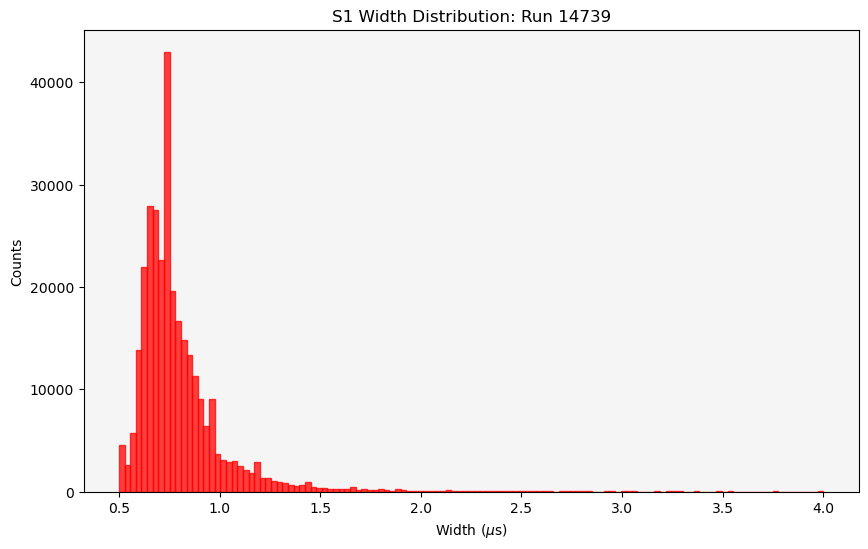

In [101]:
# Global
n_bins = 125

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        W1 = raw_data[run_id]['S1w'] / 1e3  # [μs]
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(W1, bins=n_bins,
                                   color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Width ($\mu$s)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f'S1 Width Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

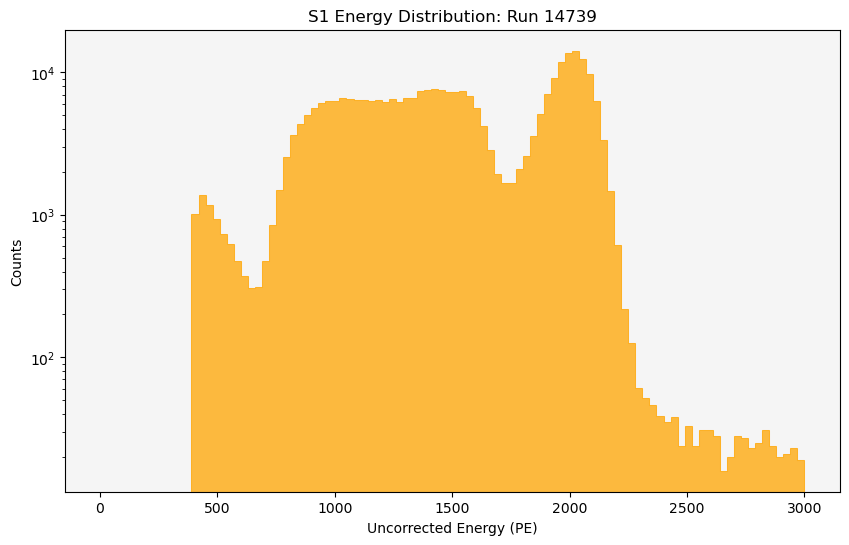

In [32]:
# Global
n_bins = 100
x_min, x_max = 0, 3e3
x_edges = np.linspace(x_min, x_max, n_bins + 1)

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:

        # Variables
        E1 = raw_data[run_id]['S1e']

        # Histogram: normalized by corrected DAQ data taking time
        E1_counts, E1_edges = np.histogram(E1, bins=x_edges)

        # Histogram
        plt.figure(figsize=(10, 6))
        plt.stairs(E1_counts, E1_edges,
                   fill=True, color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                   ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=0.75,)
        
        # Plot
        plt.xlabel('Uncorrected Energy (PE)')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.title(f'S1 Energy Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

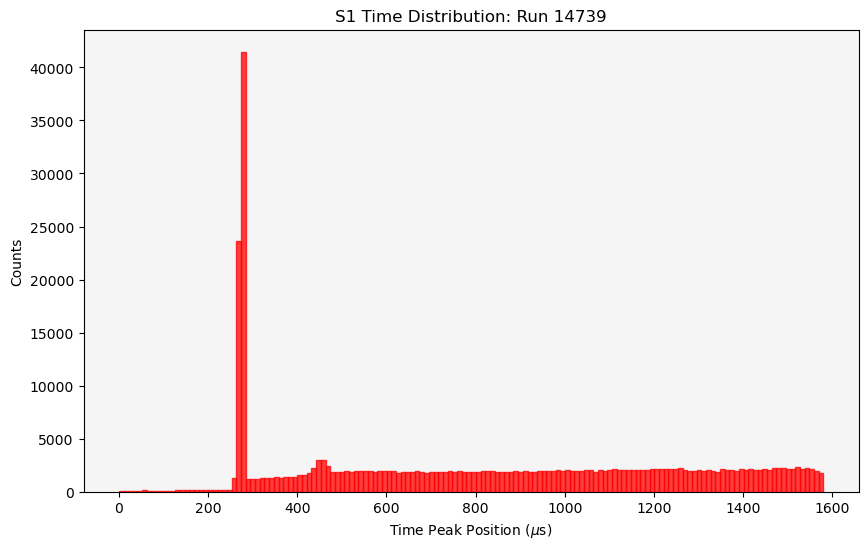

In [33]:
# Global
n_bins =150

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        T1 = raw_data[run_id]['S1t'] / 1e3  # [μs]
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(T1, bins=n_bins,
                                   color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Time Peak Position ($\mu$s)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f'S1 Time Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### $S2$ distributions

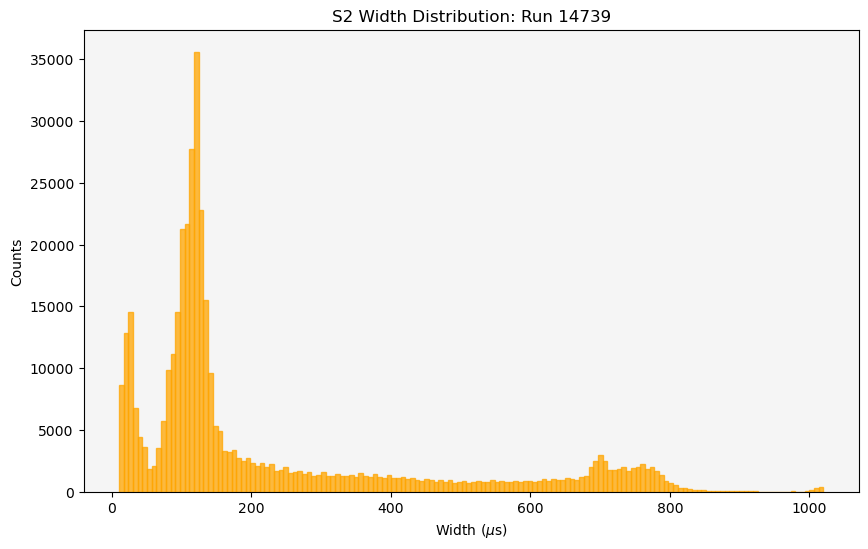

In [32]:
# Global
n_bins = 150

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        W2 = raw_data[run_id]['S2w']
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(W2, bins=n_bins,
                                   color=pt.hist_colors[(i + 3) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 3) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Width ($\mu$s)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f'S2 Width Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

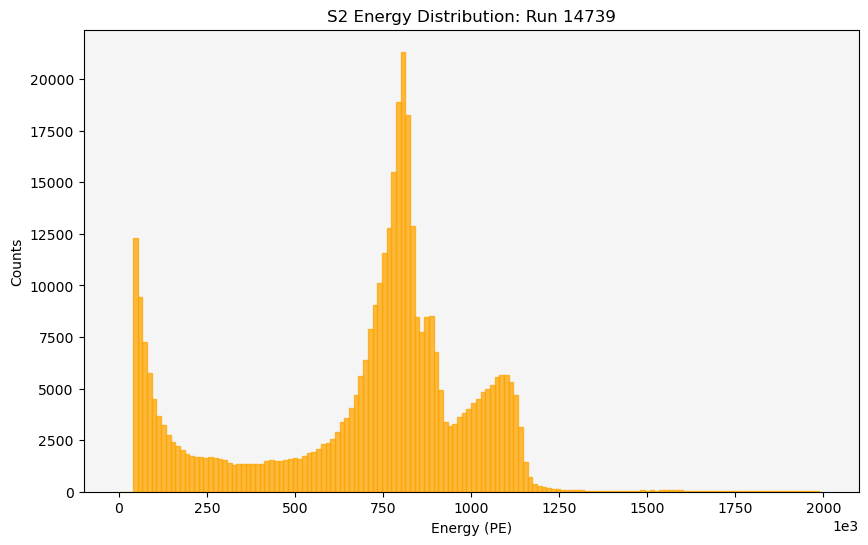

In [107]:
# Global
n_bins = 150

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        E2 = raw_data[run_id]['S2e']
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(E2, bins=n_bins, range=(0, 2000e3),                                  # There are some events with greater energy
                                   color=pt.hist_colors[(i + 3) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 3) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Energy (PE)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
        plt.title(f'S2 Energy Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

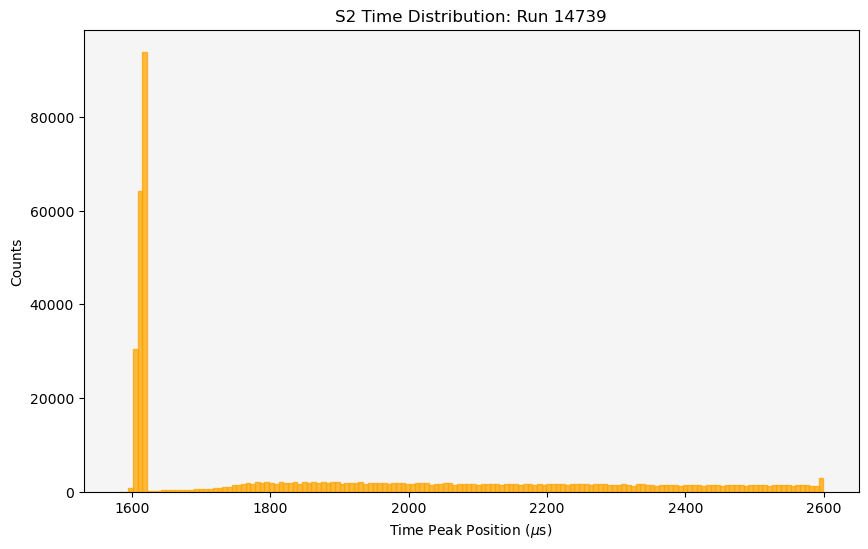

In [44]:
# Global
n_bins = 150

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        T2 = raw_data[run_id]['S2t'] / 1e3  # [μs]
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(T2, bins=n_bins,
                                   color=pt.hist_colors[(i + 3) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 3) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Time Peak Position ($\mu$s)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f'S2 Time Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

## Selected Sample

We first group the dataframes of interest by event to perform selection at event-level and compute the selection efficiency.

In [108]:
# Store the selected dataframes
sel_data = {run["run_number"]: pd.DataFrame() for run in runs_info}

for i, entry in enumerate(runs_info):

    # Run info
    run_id = entry["run_number"]

    # Apply selection criteria only to chosen runs    
    if run_id in selected_runs:

        # Total number of events
        total_events = raw_data[run_id]['event'].nunique()

        print(f"Run {run_id} - Selection Efficiency:")
        print(f"  Initially: {total_events} events")

        # Start with full dataset
        df_selected = raw_data[run_id]

        # Define cuts and labels
        selection_cuts = [
                                ("Multiplicities", lambda x: (x['nS1'].sum() == 1) & (x['nS2'].sum() == 1)),
                                ("S1 Energy",      lambda x: (600   < x['S1e'].sum() < 3000  )),
                                ("S1 Time",        lambda x: (200e3 < x['S1t'].sum()         )),
                                ("S2 Width",       lambda x: (50    < x['S2w'].sum() < 500   )),
                                ("S2 Time",        lambda x: (        x['S2t'].sum() < 1650e3))
                         ]

        # Apply each cut step by step
        for label, condition in selection_cuts:

            df_selected = df_selected.groupby('event').filter(condition)
            rem_events  = df_selected['event'].nunique()
            
            print(f"  After {label}: {rem_events} events ({(rem_events / total_events) * 100:.2f}%)")

        # Store final selected data
        sel_data[run_id] = df_selected


Run 14739 - Selection Efficiency:
  Initially: 339737 events
  After Multiplicities: 200353 events (58.97%)
  After S1 Energy: 197099 events (58.02%)
  After S1 Time: 196861 events (57.95%)
  After S2 Width: 145023 events (42.69%)
  After S2 Time: 91981 events (27.07%)


## Base Distributions (with cuts!)

How did the relevant distribution change?

### Radial distribution

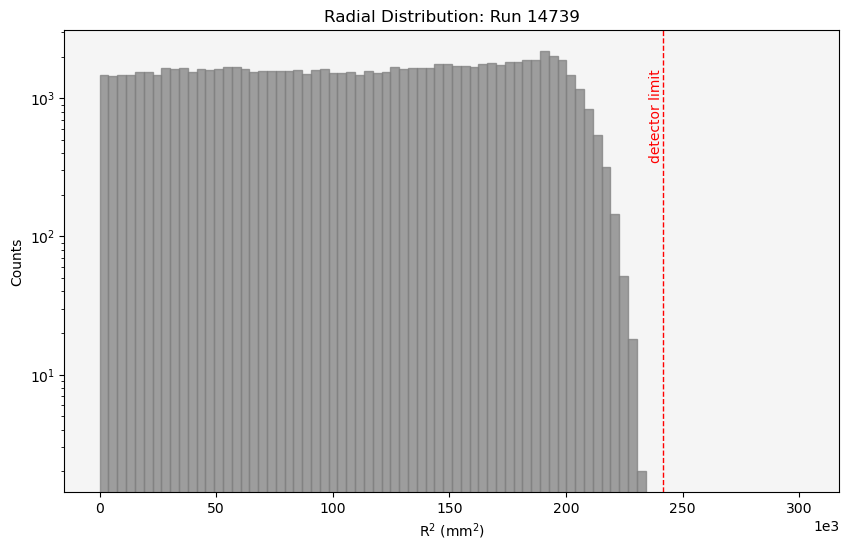

In [83]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        R2 = sel_data[run_id]['X']**2 + sel_data[run_id]['Y']**2
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(R2, bins=n_bins, range=(R2.min(), 1.25*pt.N100_rad**2),
                                   color=pt.hist_colors[i % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('R$^{2}$ (mm$^{2}$)')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.title(f'Radial Distribution: Run {run_id}')
        plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
        # Radial limit
        plt.axvline(x=pt.N100_rad**2, c='red', ls='--', lw=1)
        plt.text(pt.N100_rad**2, 0.5*counts[0], 'detector limit', c='red', va='center',  ha='right',  rotation=90)

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### DT distribution

Run 14739: No negative DT values found.


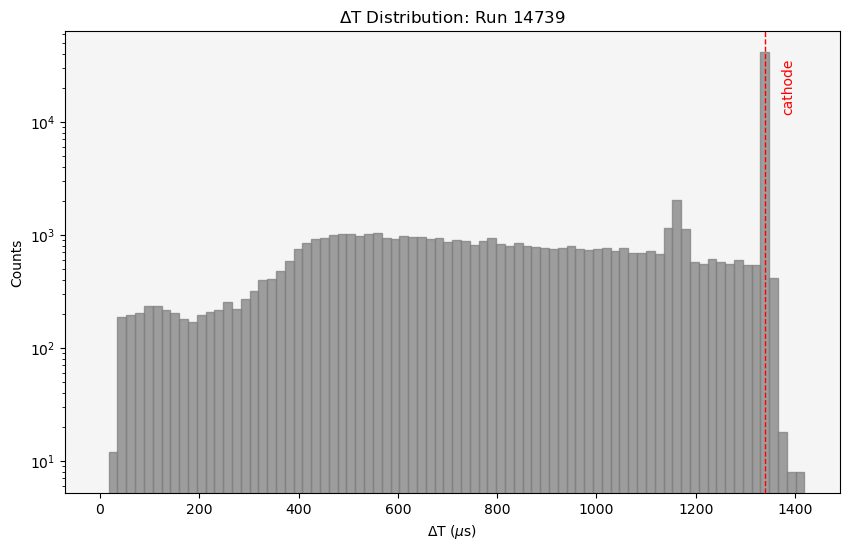

In [85]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        DT = sel_data[run_id]['DT']
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(DT, bins=n_bins, range=(0, DT.max()),
                                   color=pt.hist_colors[i % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0)
        
        # Estimated cathode time position + error
        cath_index   = np.argmax(counts)                                                     # Index of the bin with the highest count
        cath_central = (bins[cath_index] + bins[cath_index + 1]) / 2 
        cath_error   = (bins[1] - bins[0]) / 2 

        # Negative DT's?
        negative_DT = sel_data[run_id][DT < 0]    
        if not negative_DT.empty:
            print(f"Run {run_id}: There are {len(negative_DT)} negative DT values.")
        else:
            print(f"Run {run_id}: No negative DT values found.")
        
        # Plot
        plt.xlabel('$\Delta$T ($\mu$s)')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.title(f'$\Delta$T Distribution: Run {run_id}')
        # Cathode line
        plt.axvline(x=cath_central, c='red', ls='--', lw=1)
        plt.text(1.025*cath_central, 0.5*counts[cath_index], 'cathode', c='red', va='center',  ha='left',  rotation=90)

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### $S1w$

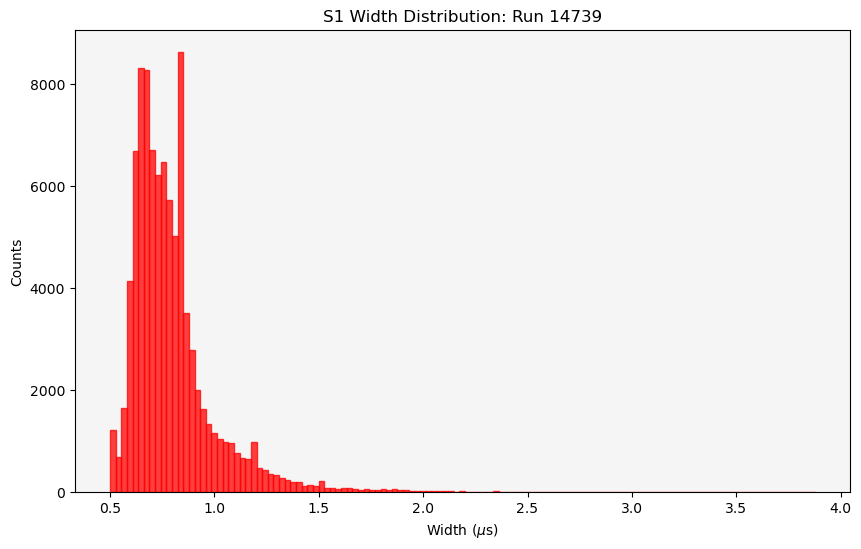

In [120]:
# Global
n_bins = 125

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        W1 = sel_data[run_id]['S1w'] / 1e3  # [μs]
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(W1, bins=n_bins,
                                   color=pt.hist_colors[(i + 2) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 2) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Width ($\mu$s)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f'S1 Width Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

### $S2e$

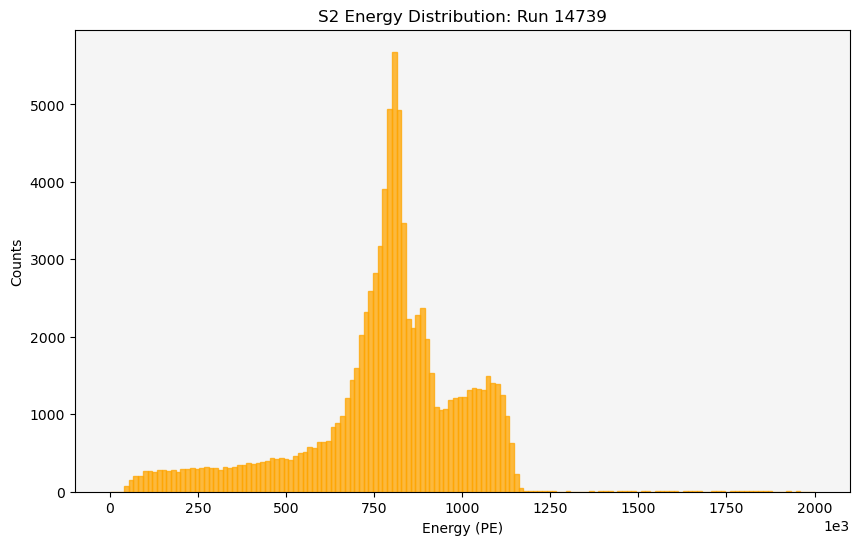

In [106]:
# Global
n_bins = 150

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]    
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:
        
        # Variables
        E2 = sel_data[run_id]['S2e']
        
        # Histogram
        plt.figure(figsize=(10, 6))
        counts, bins, _ = plt.hist(E2, bins=n_bins, range=(0, 2000e3),                                  # There are some events with greater energy
                                   color=pt.hist_colors[(i + 3) % len(pt.hist_colors)], alpha=0.75,
                                   ec=pt.hist_colors[(i + 3) % len(pt.hist_colors)], lw=1.0)
        
        # Plot
        plt.xlabel('Energy (PE)')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))
        plt.title(f'S2 Energy Distribution: Run {run_id}')

        plt.gca().set_facecolor("whitesmoke")
        plt.show()

## Po-like Population

How does it look the Po-like masking?

Run 14739 fit: slope = 0.17, intercept = 3.73 PE
Run 14739 Po-like masking line: slope = 0.17, intercept = -56 PE


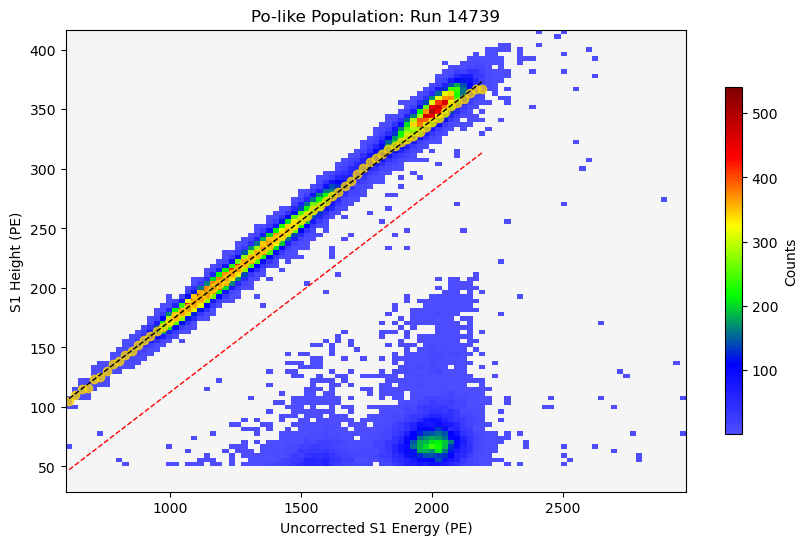

In [ ]:
# Global
n_bins = 100
E1_up  = 2200          # E1 upper limit for the fit
Po_intercept = -56     # Computed using the fit line slope and a desire point: (1800, 250)

for i, entry in enumerate(runs_info):

    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]

    if run_id in selected_runs:

        # Variables
        H1 = sel_data[run_id]['S1h']
        E1 = sel_data[run_id]['S1e']

        # 2D histogram
        S1h_S1e_map, ex, ey = pt.hist_2D(E1, H1, x_bins=n_bins, y_bins=n_bins)
        S1h_S1e_map         = np.ma.masked_where(S1h_S1e_map==0, S1h_S1e_map)   # Zero values masked
        
        # Preliminar fitting
        E1_centers, S1h_medians = ff.prefit_2D(ex, E1, H1, x_max=E1_up)
        # Linear fitting
        popt, pcov = curve_fit(ff.linear_func, E1_centers, S1h_medians)
        print(f'Run {run_id} fit: slope = {popt[0]:.2f}, intercept = {popt[1]:.2f} PE')
        fit_x = np.linspace(E1_centers.min(), E1_centers.max(), n_bins)
        fit_y = ff.linear_func(fit_x, *popt)
        # Masking line
        print(f'Run {run_id} Po-like masking line: slope = {popt[0]:.2f}, intercept = {Po_intercept} PE')
        mask_y = ff.linear_func(fit_x, popt[0], Po_intercept)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(ex, ey, S1h_S1e_map.T, cmap=pt.custom_hsv, shading='auto')
        plt.colorbar(label='Counts', shrink=0.75)
        plt.xlabel('Uncorrected S1 Energy (PE)')
        plt.ylabel('S1 Height (PE)')
        plt.title (f'Po-like Population: Run {run_id}')
        # Fit
        plt.scatter(E1_centers, S1h_medians, c='gold', alpha=0.75)
        plt.plot(fit_x, fit_y, c='black', ls='--', lw=1)
        # Masking line
        plt.plot(fit_x, mask_y, c='red', ls='--', lw=1)
        
        plt.gca().set_facecolor("whitesmoke")
        plt.show()